# 1. 분석목표

## Data Set

In [2]:
import os
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# matplotlib font
plt.rcParams['font.family'] = 'NanumGothic'

# '-' 기호가 제대로 표시되도록 하는 설정
plt.rcParams['axes.unicode_minus'] = False

# plotly in Local
pio.renderers.default = "notebook_connected"

# plotly font
pio.templates["plotly"]["layout"]["font"]["family"] = "NanumGothic"

cwd = os.getcwd()
print("current working directory:", cwd)

current working directory: c:\Users\sci\Desktop\rfm_dacon


In [3]:
def read_folder_csv(directory):
    file_list = [name for name in os.listdir(directory) if name.endswith(".csv")] #startwith(), xx in file, xx not in file, endswith()
    print(file_list)
    data_dict = {}
    for i in file_list:
        data_dict[i] = pd.read_csv(os.path.join(directory, i))
    return data_dict
    

def read_folder_json(directory):
    dict_list = []
    for i in file_list:
        for line in open((path+i),"r"):
            dict_list.append(json.loads(line))
    df = pd.DataFrame(dict_list)

In [4]:
root_path = "C:/Users/sci/Desktop/Data/dacon_segment_1/"

data_dict = read_folder_csv(root_path)

['Customer_info.csv', 'Discount_info.csv', 'Marketing_info.csv', 'Onlinesales_info.csv', 'Tax_info.csv']


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 10)

data_dict

{'Customer_info.csv':            고객ID 성별        고객지역  가입기간
 0     USER_1358  남     Chicago    12
 1     USER_0190  남  California    43
 2     USER_0066  남     Chicago    33
 3     USER_0345  여  California    30
 4     USER_0683  남  California    49
 ...         ... ..         ...   ...
 1463  USER_0513  여    New York    41
 1464  USER_0167  여     Chicago    48
 1465  USER_0845  남  New Jersey    19
 1466  USER_0504  여    New York    45
 1467  USER_0562  여  California     7
 
 [1468 rows x 4 columns],
 'Discount_info.csv':        월                제품카테고리    쿠폰코드  할인율
 0    Jan               Apparel  SALE10   10
 1    Feb               Apparel  SALE20   20
 2    Mar               Apparel  SALE30   30
 3    Jan              Nest-USA  ELEC10   10
 4    Feb              Nest-USA  ELEC20   20
 ..   ...                   ...     ...  ...
 199  Nov  Notebooks & Journals    NJ20   20
 200  Dec  Notebooks & Journals    NJ30   30
 201  Oct               Android   AND10   10
 202  Nov               

- 'Customer_info.csv'와 'Onlinesales_info.csv'의 고객ID
- 'Discount_info.csv'와 'Onlinesales_info.csv'의 제품카테고리+월
- 'Marketing_info.csv' 날짜와 'Onlinesales_info.csv' 거래날짜
- 'Tax_info.csv'와 'Onlinesales_info.csv'의 제품카테고리

In [6]:
# dict에서 각각 파일명 지정
def split_filename(dict):
    for i in dict.keys():
        filenames = os.path.splitext(i)[0]
        globals()[filenames] = dict[i]

In [7]:
split_filename(data_dict)

In [8]:
# print(Customer_info, Discount_info, Marketing_info, Onlinesales_info, Tax_info)

In [9]:
#merge
test = Onlinesales_info.merge(Customer_info, how = 'left', on = '고객ID')

Marketing_info.rename(columns = {'날짜': '거래날짜'}, inplace = True)
test = test.merge(Marketing_info, how = 'left', on = '거래날짜')
test = test.merge(Tax_info, how = 'left', on = '제품카테고리')

In [10]:
test

고객ID               거래ID        거래날짜          제품ID    제품카테고리  수량  \
0      USER_1358   Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1      USER_1358   Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2      USER_1358   Transaction_0002  2019-01-01  Product_0904    Office   1   
3      USER_1358   Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4      USER_1358   Transaction_0003  2019-01-01  Product_0848      Bags   1   
...          ...                ...         ...           ...       ...  ..   
52919  USER_0504  Transaction_25056  2019-12-31  Product_0976  Nest-USA   1   
52920  USER_0504  Transaction_25057  2019-12-31  Product_0413   Apparel   1   
52921  USER_0504  Transaction_25058  2019-12-31  Product_0989  Nest-USA   1   
52922  USER_0562  Transaction_25059  2019-12-31  Product_0985  Nest-USA   5   
52923  USER_0562  Transaction_25060  2019-12-31  Product_0984  Nest-USA   4   

         평균금액    배송료      쿠폰상태 성별        고객지역  가입기간  오프라인비용    온라인비용   GST  
0      153.71   6.50      Used  남     Chicago    12    4500  2424.50  0.10  
1      153.71   6.50      Used  남     Chicago    12    4500  2424.50  0.10  
2        2.05   6.50      Used  남     Chicago    12    4500  2424.50  0.10  
3       17.53   6.50  Not Used  남     Chicago    12    4500  2424.50  0.18  
4       16.50   6.50      Used  남     Chicago    12    4500  2424.50  0.18  
...       ...    ...       ... ..         ...   ...     ...      ...   ...  
52919  121.30   6.50   Clicked  여    New York    45    4000  2058.75  0.10  
52920   48.92   6.50      Used  여    New York    45    4000  2058.75  0.18  
52921  151.88   6.50      Used  여    New York    45    4000  2058.75  0.10  
52922   80.52   6.50   Clicked  여  California     7    4000  2058.75  0.10  
52923   80.52  19.99   Clicked  여  California     7    4000  2058.75  0.10  

[52924 rows x 15 columns]

In [11]:
# key 만들기
Discount_info['key'] = Discount_info['월'] + Discount_info['제품카테고리']

In [12]:
from datetime import datetime
import locale

# 현재 locale 저장
old_locale = locale.getlocale(locale.LC_TIME)

# 임시로 locale을 영어로 설정
locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')

#날짜 -> 영어약자로 변경
test['거래날짜'] = pd.to_datetime(test['거래날짜'])
test['월'] = test['거래날짜'].apply(lambda x: x.strftime('%b'))

# locale을 원래대로 복구
locale.setlocale(locale.LC_TIME, old_locale)

'C'

In [13]:
test['key'] = test['월'] + test['제품카테고리']
test

고객ID               거래ID       거래날짜          제품ID    제품카테고리  수량  \
0      USER_1358   Transaction_0000 2019-01-01  Product_0981  Nest-USA   1   
1      USER_1358   Transaction_0001 2019-01-01  Product_0981  Nest-USA   1   
2      USER_1358   Transaction_0002 2019-01-01  Product_0904    Office   1   
3      USER_1358   Transaction_0003 2019-01-01  Product_0203   Apparel   5   
4      USER_1358   Transaction_0003 2019-01-01  Product_0848      Bags   1   
...          ...                ...        ...           ...       ...  ..   
52919  USER_0504  Transaction_25056 2019-12-31  Product_0976  Nest-USA   1   
52920  USER_0504  Transaction_25057 2019-12-31  Product_0413   Apparel   1   
52921  USER_0504  Transaction_25058 2019-12-31  Product_0989  Nest-USA   1   
52922  USER_0562  Transaction_25059 2019-12-31  Product_0985  Nest-USA   5   
52923  USER_0562  Transaction_25060 2019-12-31  Product_0984  Nest-USA   4   

         평균금액    배송료      쿠폰상태 성별        고객지역  가입기간  오프라인비용    온라인비용   GST  \
0      153.71   6.50      Used  남     Chicago    12    4500  2424.50  0.10   
1      153.71   6.50      Used  남     Chicago    12    4500  2424.50  0.10   
2        2.05   6.50      Used  남     Chicago    12    4500  2424.50  0.10   
3       17.53   6.50  Not Used  남     Chicago    12    4500  2424.50  0.18   
4       16.50   6.50      Used  남     Chicago    12    4500  2424.50  0.18   
...       ...    ...       ... ..         ...   ...     ...      ...   ...   
52919  121.30   6.50   Clicked  여    New York    45    4000  2058.75  0.10   
52920   48.92   6.50      Used  여    New York    45    4000  2058.75  0.18   
52921  151.88   6.50      Used  여    New York    45    4000  2058.75  0.10   
52922   80.52   6.50   Clicked  여  California     7    4000  2058.75  0.10   
52923   80.52  19.99   Clicked  여  California     7    4000  2058.75  0.10   

         월          key  
0      Jan  JanNest-USA  
1      Jan  JanNest-USA  
2      Jan    JanOffice  
3      Jan   JanApparel  
4      Jan      JanBags  
...    ...          ...  
52919  Dec  DecNest-USA  
52920  Dec   DecApparel  
52921  Dec  DecNest-USA  
52922  Dec  DecNest-USA  
52923  Dec  DecNest-USA  

[52924 rows x 17 columns]

In [14]:
test = test.merge(Discount_info, how = 'left', on = 'key')

In [15]:
test.drop(columns = ['월_x', '월_y', 'key', '제품카테고리_y'], axis=1, inplace=True)
test.rename(columns = {'제품카테고리_x': '제품카테고리'}, inplace = True)

In [16]:
test.head()

고객ID              거래ID       거래날짜          제품ID    제품카테고리  수량    평균금액  \
0  USER_1358  Transaction_0000 2019-01-01  Product_0981  Nest-USA   1  153.71   
1  USER_1358  Transaction_0001 2019-01-01  Product_0981  Nest-USA   1  153.71   
2  USER_1358  Transaction_0002 2019-01-01  Product_0904    Office   1    2.05   
3  USER_1358  Transaction_0003 2019-01-01  Product_0203   Apparel   5   17.53   
4  USER_1358  Transaction_0003 2019-01-01  Product_0848      Bags   1   16.50   

   배송료      쿠폰상태 성별     고객지역  가입기간  오프라인비용   온라인비용   GST    쿠폰코드   할인율  
0  6.5      Used  남  Chicago    12    4500  2424.5  0.10  ELEC10  10.0  
1  6.5      Used  남  Chicago    12    4500  2424.5  0.10  ELEC10  10.0  
2  6.5      Used  남  Chicago    12    4500  2424.5  0.10   OFF10  10.0  
3  6.5  Not Used  남  Chicago    12    4500  2424.5  0.18  SALE10  10.0  
4  6.5      Used  남  Chicago    12    4500  2424.5  0.18   AIO10  10.0

In [17]:
test.shape

(52924, 17)

In [18]:
pd.set_option('display.max_row', 20)
test.dtypes

고객ID              object
거래ID              object
거래날짜      datetime64[ns]
제품ID              object
제품카테고리            object
수량                 int64
평균금액             float64
배송료              float64
쿠폰상태              object
성별                object
고객지역              object
가입기간               int64
오프라인비용             int64
온라인비용            float64
GST              float64
쿠폰코드              object
할인율              float64
dtype: object

## 

## Cleansing

### fillna

In [19]:
#중복여부
test[test.duplicated()]

Empty DataFrame
Columns: [고객ID, 거래ID, 거래날짜, 제품ID, 제품카테고리, 수량, 평균금액, 배송료, 쿠폰상태, 성별, 고객지역, 가입기간, 오프라인비용, 온라인비용, GST, 쿠폰코드, 할인율]
Index: []

In [20]:
test.isnull().sum()

고객ID        0
거래ID        0
거래날짜        0
제품ID        0
제품카테고리      0
수량          0
평균금액        0
배송료         0
쿠폰상태        0
성별          0
고객지역        0
가입기간        0
오프라인비용      0
온라인비용       0
GST         0
쿠폰코드      400
할인율       400
dtype: int64

In [21]:
test[test['쿠폰코드'].isna()]

고객ID               거래ID       거래날짜          제품ID     제품카테고리  수량  \
62     USER_1358   Transaction_0020 2019-01-01  Product_1138        Fun   4   
95     USER_0585   Transaction_0046 2019-01-02  Product_0863  Backpacks   1   
157    USER_1421   Transaction_0078 2019-01-02  Product_0950        Fun   1   
178    USER_0906   Transaction_0095 2019-01-02  Product_0196        Fun   2   
193    USER_0954   Transaction_0105 2019-01-02  Product_0886     Google   1   
...          ...                ...        ...           ...        ...  ..   
44213  USER_0034  Transaction_19979 2019-10-30  Product_0863  Backpacks   1   
45167  USER_0643  Transaction_20483 2019-11-07  Product_0863  Backpacks   1   
45807  USER_1435  Transaction_20841 2019-11-12  Product_0863  Backpacks   1   
46239  USER_1174  Transaction_21068 2019-11-15  Product_0863  Backpacks   1   
46966  USER_0008  Transaction_21486 2019-11-21  Product_0861  Backpacks   1   

         평균금액    배송료      쿠폰상태 성별           고객지역  가입기간  오프라인비용    온라인비용   GST  \
62       9.27   6.50      Used  남        Chicago    12    4500  2424.50  0.18   
95     103.15   6.50   Clicked  여       New York    46    4500  3480.36  0.10   
157      7.42   6.50      Used  여     California    10    4500  3480.36  0.18   
178      7.42   6.50  Not Used  여  Washington DC    40    4500  3480.36  0.18   
193     11.54  17.96   Clicked  여     California    30    4500  3480.36  0.10   
...       ...    ...       ... ..            ...   ...     ...      ...   ...   
44213   79.99   6.00   Clicked  여     New Jersey     2    2000   780.15  0.10   
45167   79.99   6.00  Not Used  여     California    34    3500  1252.63  0.10   
45807   99.99   6.00   Clicked  여        Chicago     3    4000  3390.82  0.10   
46239   79.99   6.00      Used  여        Chicago    35    4000   737.08  0.10   
46966   99.99   6.00   Clicked  여     California    27    2500   484.90  0.10   

      쿠폰코드  할인율  
62     NaN  NaN  
95     NaN  NaN  
157    NaN  NaN  
178    NaN  NaN  
193    NaN  NaN  
...    ...  ...  
44213  NaN  NaN  
45167  NaN  NaN  
45807  NaN  NaN  
46239  NaN  NaN  
46966  NaN  NaN  

[400 rows x 17 columns]

In [22]:
test.describe()

거래날짜            수량          평균금액  \
count                          52924  52924.000000  52924.000000   
mean   2019-07-05 19:16:09.450532864      4.497638     52.237646   
min              2019-01-01 00:00:00      1.000000      0.390000   
25%              2019-04-12 00:00:00      1.000000      5.700000   
50%              2019-07-13 00:00:00      1.000000     16.990000   
75%              2019-09-27 00:00:00      2.000000    102.130000   
max              2019-12-31 00:00:00    900.000000    355.740000   
std                              NaN     20.104711     64.006882   

                배송료          가입기간        오프라인비용         온라인비용           GST  \
count  52924.000000  52924.000000  52924.000000  52924.000000  52924.000000   
mean      10.517630     26.127995   2830.914141   1893.109119      0.137462   
min        0.000000      2.000000    500.000000    320.250000      0.050000   
25%        6.000000     15.000000   2500.000000   1252.630000      0.100000   
50%        6.000000     27.000000   3000.000000   1837.870000      0.180000   
75%        6.500000     37.000000   3500.000000   2425.350000      0.180000   
max      521.360000     50.000000   5000.000000   4556.930000      0.180000   
std       19.475613     13.478285    936.154247    807.014092      0.045825   

                할인율  
count  52524.000000  
mean      19.953164  
min       10.000000  
25%       10.000000  
50%       20.000000  
75%       30.000000  
max       30.000000  
std        8.127280

In [23]:
test['할인율'] = test['할인율'].fillna(0)
test.isnull().sum()

고객ID        0
거래ID        0
거래날짜        0
제품ID        0
제품카테고리      0
수량          0
평균금액        0
배송료         0
쿠폰상태        0
성별          0
고객지역        0
가입기간        0
오프라인비용      0
온라인비용       0
GST         0
쿠폰코드      400
할인율         0
dtype: int64

## Visualization with EDA

In [24]:
box_cols = test.select_dtypes(exclude=['object', 'datetime']).columns

### boxplot

#### matplotlib

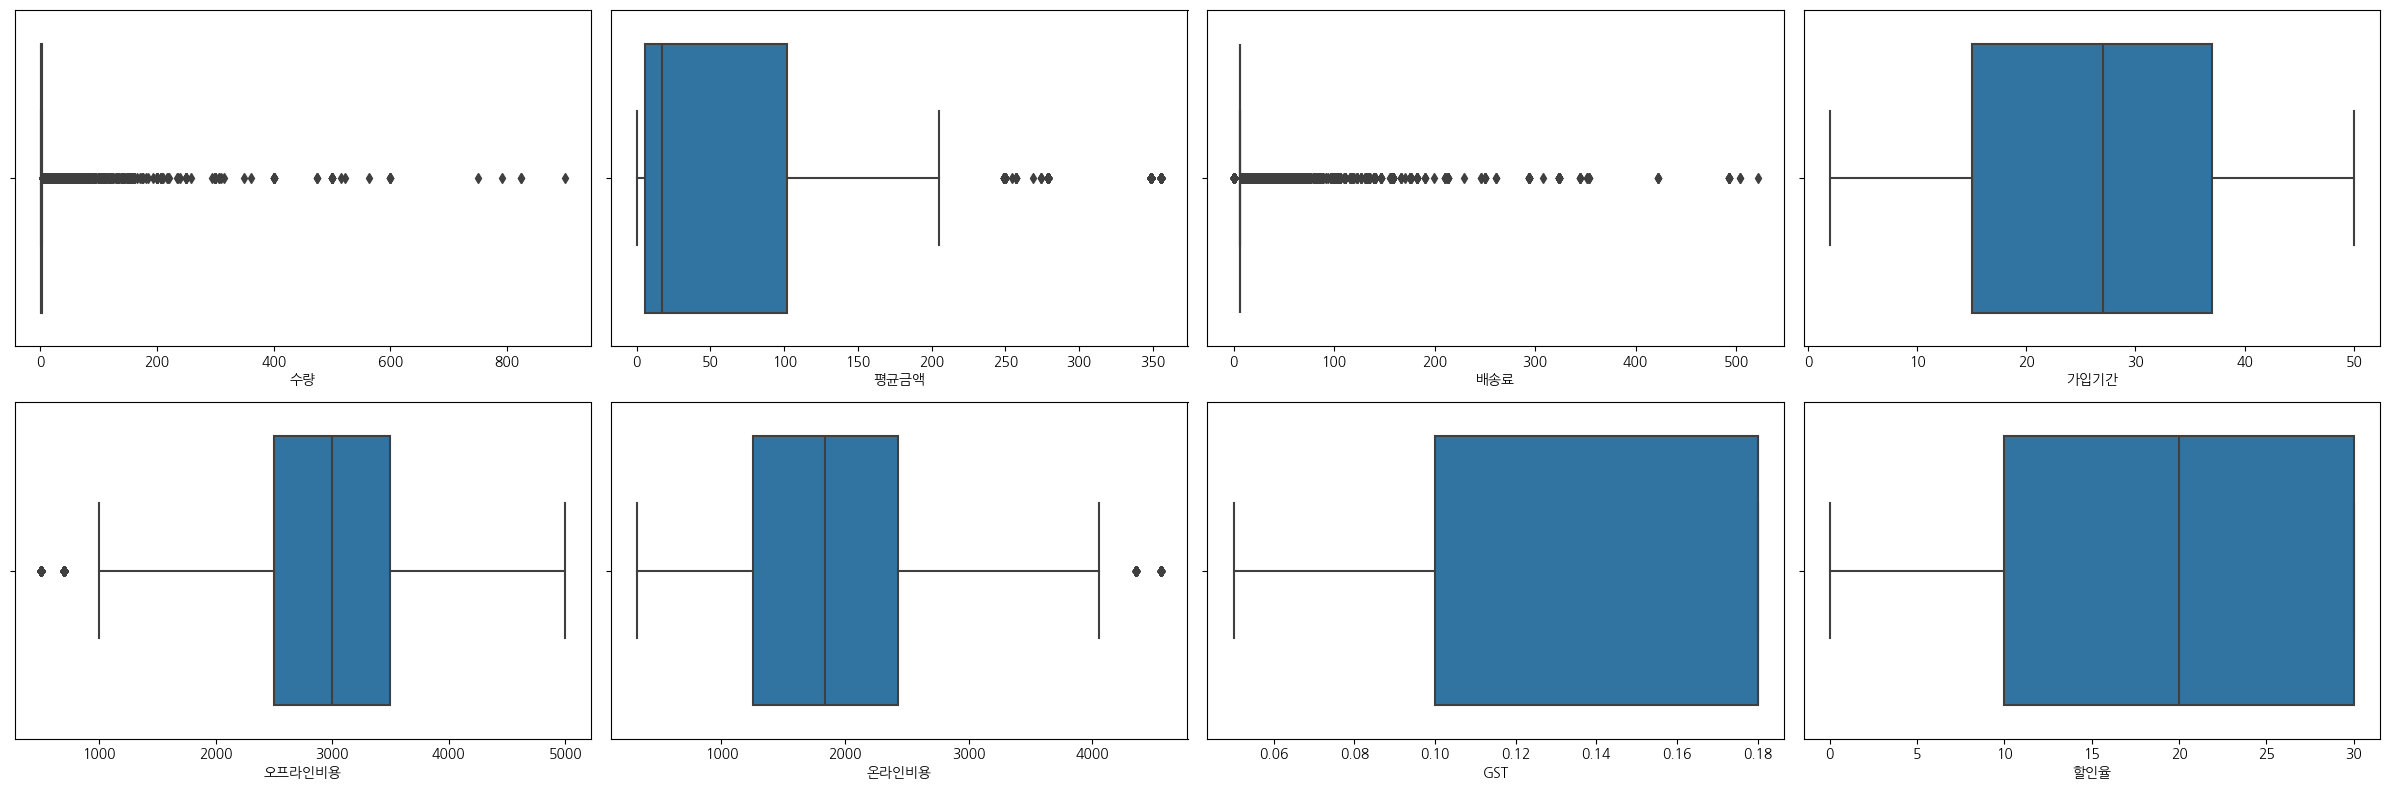

In [25]:
n = len(box_cols)
n_cols = 4
n_rows = n // n_cols + (n % n_cols > 0)

#subplot
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*6, n_rows*4))

for i, col in enumerate(box_cols):
    r, c = i // n_cols, i % n_cols
    sns.boxplot(x = test[col], ax = axs[r, c])

plt.tight_layout()
plt.show()

#### plotly

In [26]:
fig = go.Figure()

for col in box_cols:
    fig.add_trace(go.Box(y = test[col], name = col))
    
fig.update_layout(height = 100*n, width = 1200, title_text = "Box Plots", title_x=0.5, margin=dict(l=10, r=10, t=30, b=10))

fig.show(renderer="vscode")

In [27]:
test[test['수량'] == 900]

고객ID               거래ID       거래날짜          제품ID  제품카테고리   수량  \
42456  USER_0546  Transaction_19068 2019-10-16  Product_0914  Office  900   

       평균금액    배송료  쿠폰상태 성별        고객지역  가입기간  오프라인비용   온라인비용  GST   쿠폰코드  \
42456  0.99  12.99  Used  여  California    24    2500  1218.6  0.1  OFF10   

        할인율  
42456  10.0

In [28]:
test['수량'].describe()

count    52924.000000
mean         4.497638
std         20.104711
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        900.000000
Name: 수량, dtype: float64

In [29]:
pd_id = test.groupby(['제품ID', '제품카테고리'], as_index = False)[['수량', '평균금액']].agg({'수량': 'sum', '평균금액': 'mean'})
pd_id.rename(columns = {'수량': '총수량'}, inplace= True)

c:\Users\sci\Desktop\rfm_dacon\venv\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sci\Desktop\rfm_dacon\venv\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: >

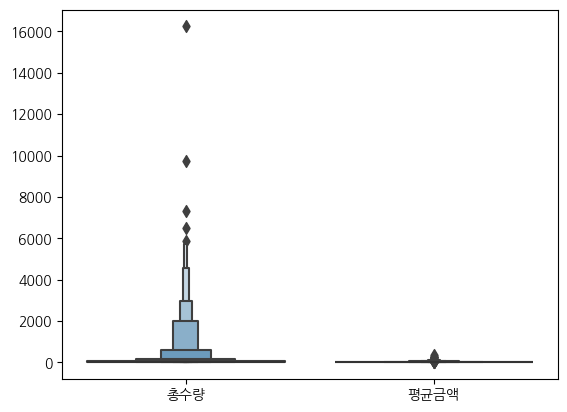

In [30]:
#어떤 제품ID가 많이 팔렸을까?

sns.boxenplot(pd_id)

In [31]:
pd_id[pd_id['총수량'] > 6000]

제품ID     제품카테고리    총수량      평균금액
854  Product_0854       Bags   7321  4.431446
880  Product_0880  Drinkware   9728  2.684666
914  Product_0914     Office  16234  0.914733
969  Product_0969     Office   6496  5.290741

### histplot

In [32]:
test.head()

고객ID              거래ID       거래날짜          제품ID    제품카테고리  수량    평균금액  \
0  USER_1358  Transaction_0000 2019-01-01  Product_0981  Nest-USA   1  153.71   
1  USER_1358  Transaction_0001 2019-01-01  Product_0981  Nest-USA   1  153.71   
2  USER_1358  Transaction_0002 2019-01-01  Product_0904    Office   1    2.05   
3  USER_1358  Transaction_0003 2019-01-01  Product_0203   Apparel   5   17.53   
4  USER_1358  Transaction_0003 2019-01-01  Product_0848      Bags   1   16.50   

   배송료      쿠폰상태 성별     고객지역  가입기간  오프라인비용   온라인비용   GST    쿠폰코드   할인율  
0  6.5      Used  남  Chicago    12    4500  2424.5  0.10  ELEC10  10.0  
1  6.5      Used  남  Chicago    12    4500  2424.5  0.10  ELEC10  10.0  
2  6.5      Used  남  Chicago    12    4500  2424.5  0.10   OFF10  10.0  
3  6.5  Not Used  남  Chicago    12    4500  2424.5  0.18  SALE10  10.0  
4  6.5      Used  남  Chicago    12    4500  2424.5  0.18   AIO10  10.0

In [33]:
test.nunique()
# 쿠폰상태, 성별, 고객지역, GST(세금), 할인율
hist_test = ['쿠폰상태', '성별', '고객지역', 'GST', '할인율']

c:\Users\sci\Desktop\rfm_dacon\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



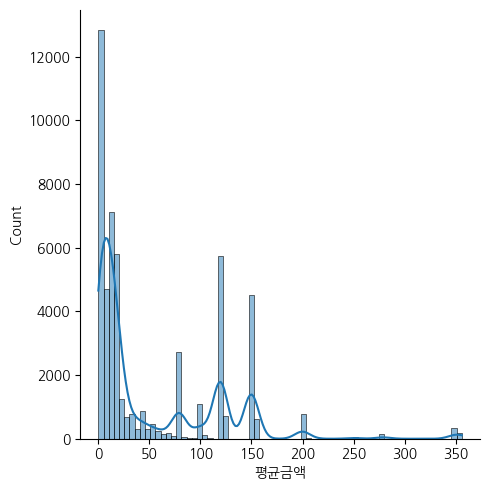

In [34]:
sns.displot(test, x = '평균금액', kde = True)

c:\Users\sci\Desktop\rfm_dacon\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sci\Desktop\rfm_dacon\venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\sci\Desktop\rfm_dacon\venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\sci\Desktop\rfm_dacon\venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of panda

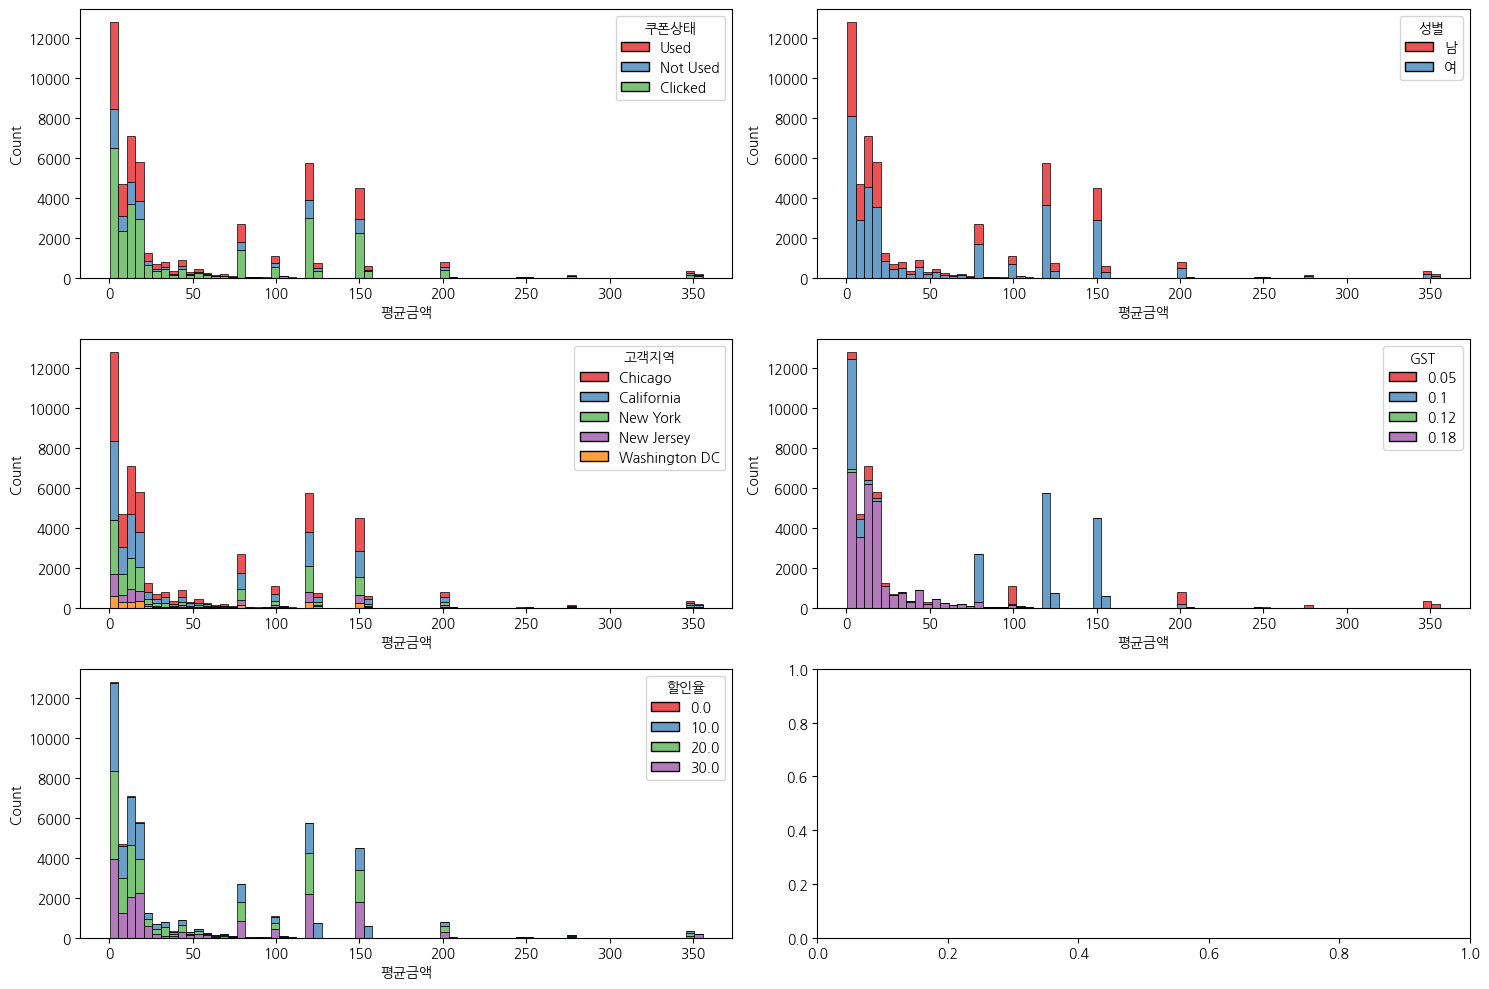

In [35]:
fig, axs = plt.subplots(3, 2, figsize = (15, 10))

[sns.histplot(test, x = '평균금액', hue = c, multiple = 'stack', palette = 'Set1', ax = axs[i//2, i%2]) for i, c in enumerate(hist_test)]

plt.tight_layout()
plt.show()

### pointplot(for categorical values)

In [36]:
test.select_dtypes(include='object').columns

Index(['고객ID', '거래ID', '제품ID', '제품카테고리', '쿠폰상태', '성별', '고객지역', '쿠폰코드'], dtype='object')

In [37]:
#어떤 제품카테고리가 많이 팔렸을까? 평균 금액은?
pnt_tab_1 = test.groupby(['제품카테고리'], as_index = False)[['수량', '평균금액']].agg({'수량': 'count', '평균금액': 'mean'})
pnt_tab_1

제품카테고리     수량        평균금액
0            Accessories    234    8.211068
1                Android     43   15.903488
2                Apparel  18126   19.788995
3              Backpacks     89   80.046404
4                   Bags   1882   29.830797
5                Bottles    268    3.437201
6              Drinkware   3483   10.696893
7                    Fun    160    6.743812
8             Gift Cards    159  111.363270
9                 Google    105   16.446190
10              Headgear    771   15.879624
11            Housewares    122    2.060574
12             Lifestyle   3092    3.860078
13             More Bags     46   19.776957
14                  Nest   2198  194.221074
15           Nest-Canada    317  157.243249
16              Nest-USA  14013  124.331850
17  Notebooks & Journals    749   11.758505
18                Office   6513    3.770012
19                  Waze    554    6.607852

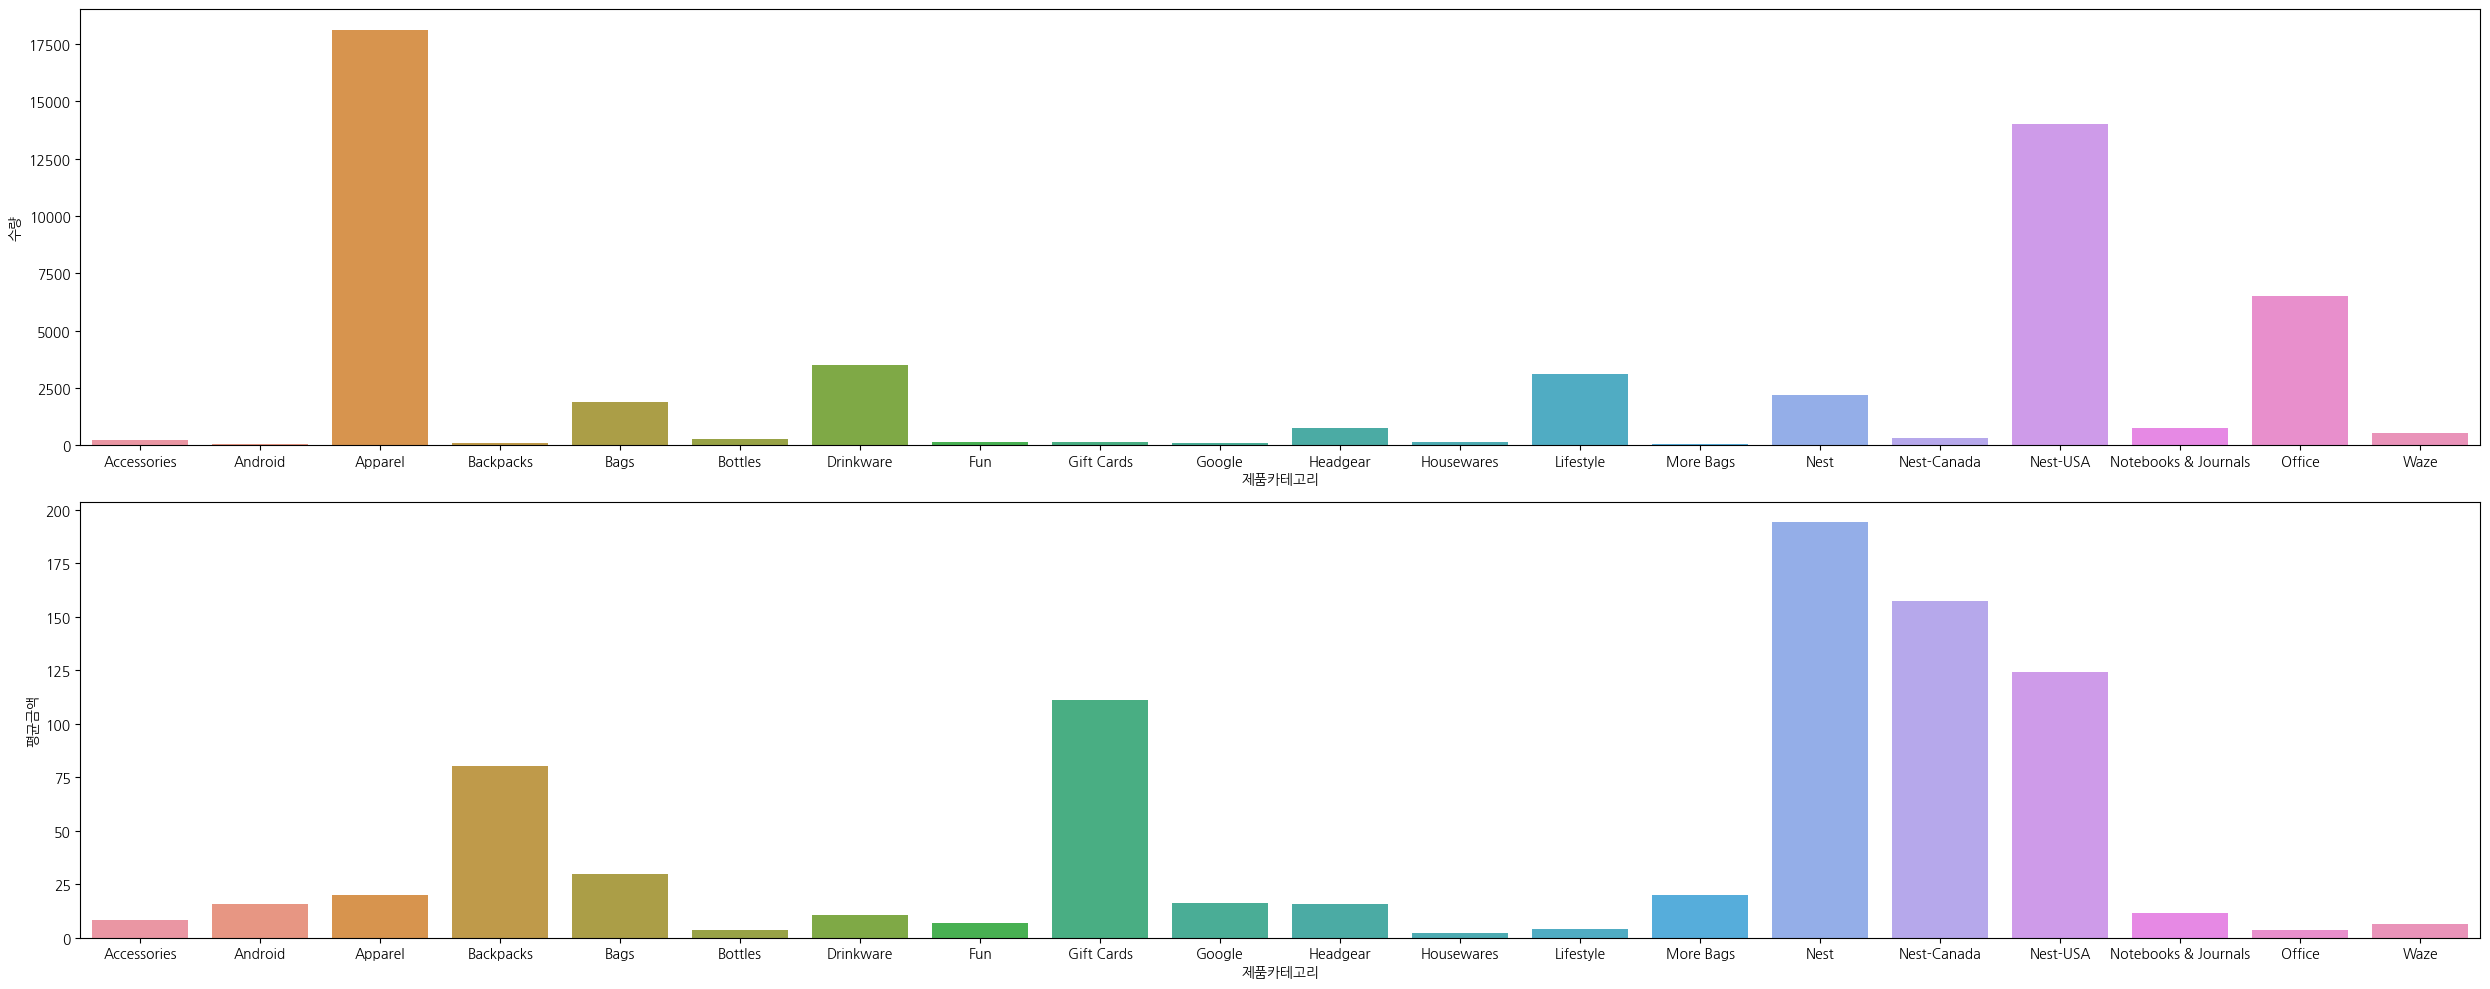

In [38]:
fig, axs = plt.subplots(2, 1, figsize = (25, 10))

sns.barplot(x='제품카테고리', y='수량', ax = axs[0], data=pnt_tab_1)
sns.barplot(x='제품카테고리', y='평균금액', ax = axs[1], data=pnt_tab_1)
plt.tight_layout()
plt.show()

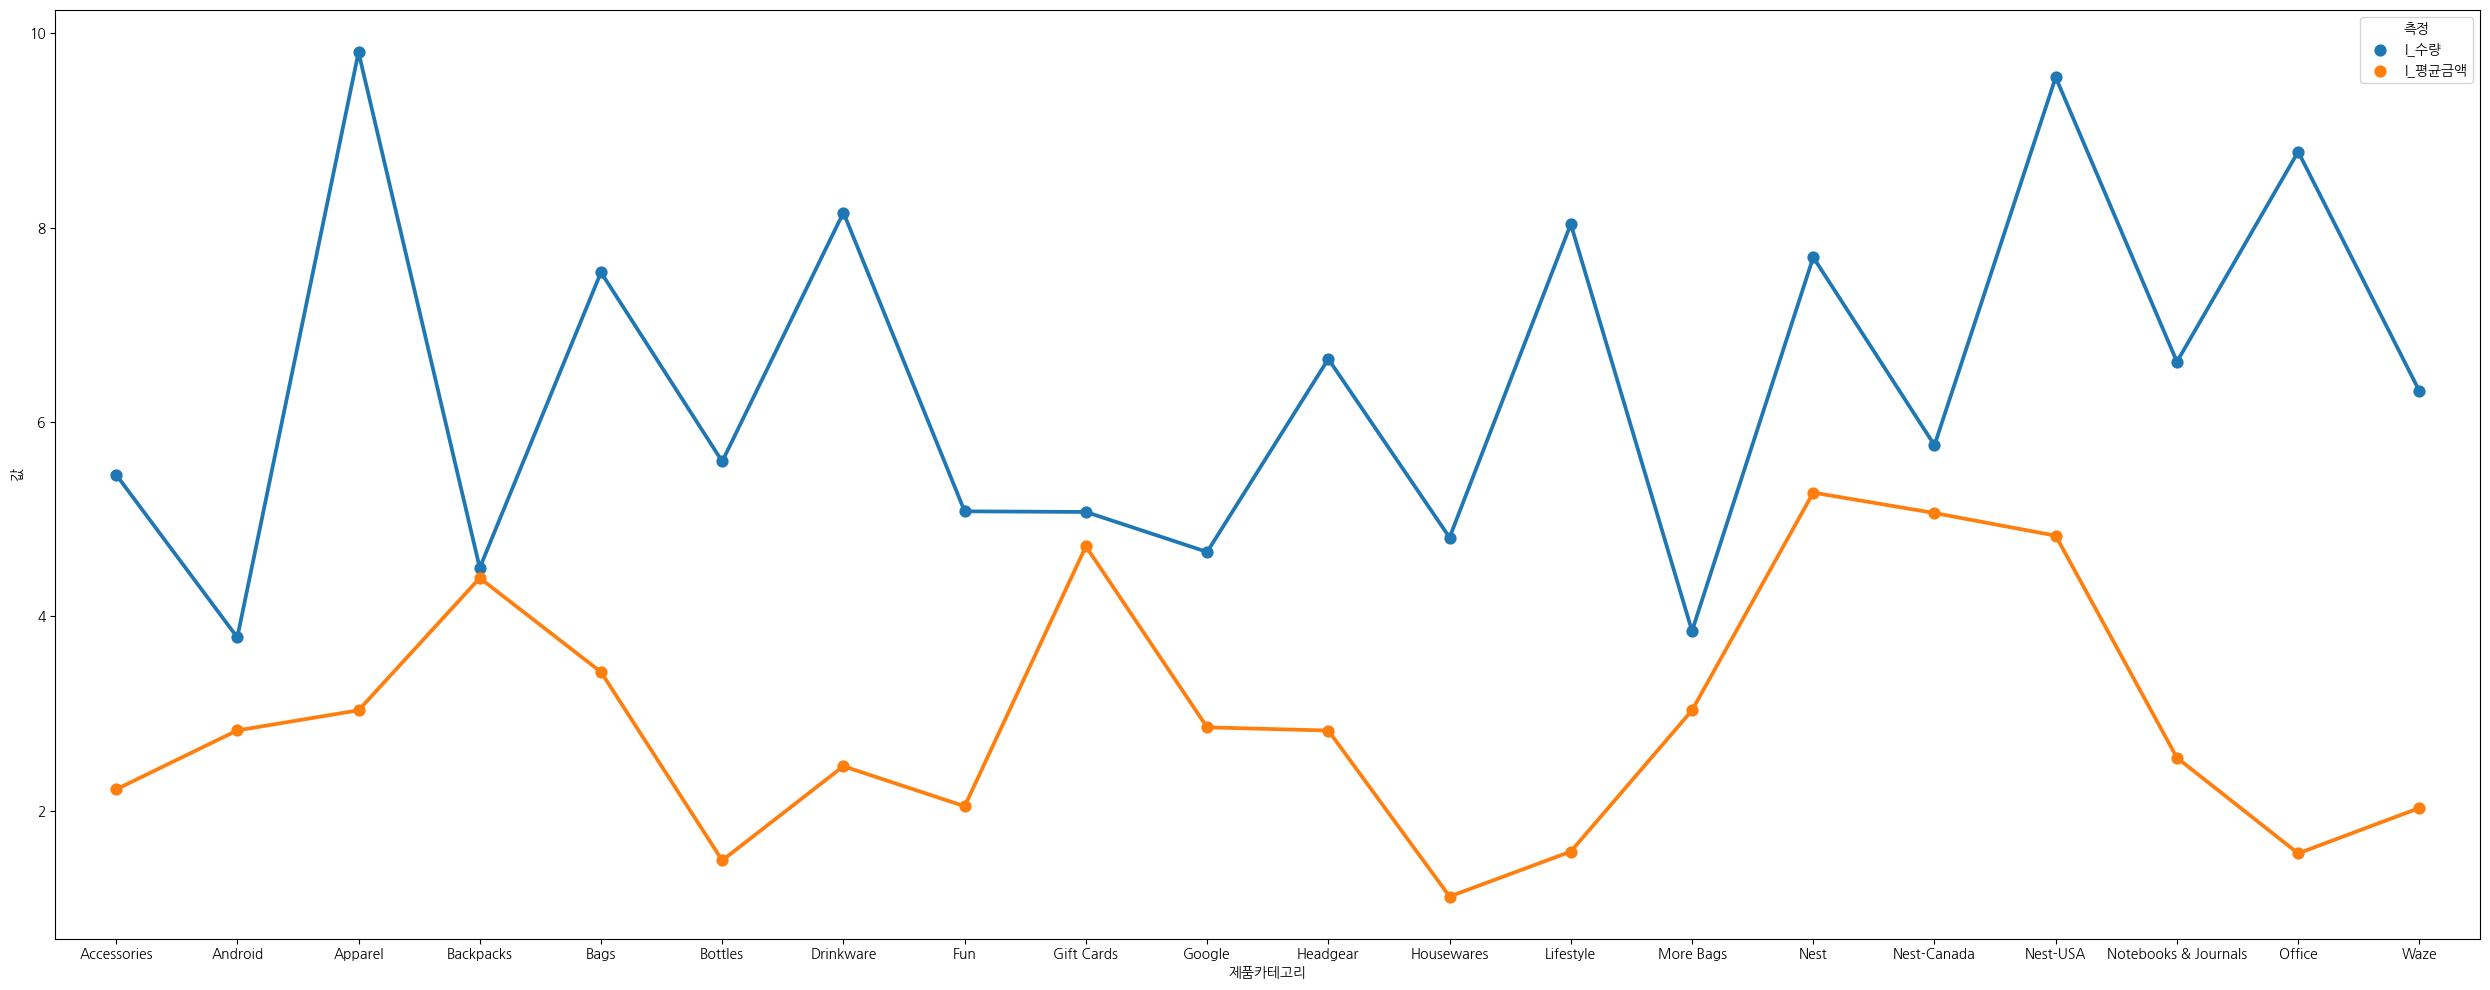

In [39]:
#그래프로 그렸을때 비교하기 편하게 로그변환
pnt_tab_1['l_수량'] = np.log1p(pnt_tab_1['수량'])
pnt_tab_1['l_평균금액'] = np.log1p(pnt_tab_1['평균금액'])

#long format
pnt_tab_melt = pnt_tab_1.melt(id_vars='제품카테고리', value_vars=['l_수량', 'l_평균금액'], var_name='측정', value_name='값')

#point plot
plt.figure(figsize=(25, 10))
sns.pointplot(x='제품카테고리', y='값', hue='측정', data=pnt_tab_melt)
plt.tight_layout()
plt.show()

In [40]:
#월별, 요일별 주문횟수

test_time = test.copy()
test_time['month'] = test['거래날짜'].dt.month
test_time['weekday'] = test['거래날짜'].dt.weekday
test_time

고객ID               거래ID       거래날짜          제품ID    제품카테고리  수량  \
0      USER_1358   Transaction_0000 2019-01-01  Product_0981  Nest-USA   1   
1      USER_1358   Transaction_0001 2019-01-01  Product_0981  Nest-USA   1   
2      USER_1358   Transaction_0002 2019-01-01  Product_0904    Office   1   
3      USER_1358   Transaction_0003 2019-01-01  Product_0203   Apparel   5   
4      USER_1358   Transaction_0003 2019-01-01  Product_0848      Bags   1   
...          ...                ...        ...           ...       ...  ..   
52919  USER_0504  Transaction_25056 2019-12-31  Product_0976  Nest-USA   1   
52920  USER_0504  Transaction_25057 2019-12-31  Product_0413   Apparel   1   
52921  USER_0504  Transaction_25058 2019-12-31  Product_0989  Nest-USA   1   
52922  USER_0562  Transaction_25059 2019-12-31  Product_0985  Nest-USA   5   
52923  USER_0562  Transaction_25060 2019-12-31  Product_0984  Nest-USA   4   

         평균금액    배송료      쿠폰상태 성별        고객지역  가입기간  오프라인비용    온라인비용   GST  \
0      153.71   6.50      Used  남     Chicago    12    4500  2424.50  0.10   
1      153.71   6.50      Used  남     Chicago    12    4500  2424.50  0.10   
2        2.05   6.50      Used  남     Chicago    12    4500  2424.50  0.10   
3       17.53   6.50  Not Used  남     Chicago    12    4500  2424.50  0.18   
4       16.50   6.50      Used  남     Chicago    12    4500  2424.50  0.18   
...       ...    ...       ... ..         ...   ...     ...      ...   ...   
52919  121.30   6.50   Clicked  여    New York    45    4000  2058.75  0.10   
52920   48.92   6.50      Used  여    New York    45    4000  2058.75  0.18   
52921  151.88   6.50      Used  여    New York    45    4000  2058.75  0.10   
52922   80.52   6.50   Clicked  여  California     7    4000  2058.75  0.10   
52923   80.52  19.99   Clicked  여  California     7    4000  2058.75  0.10   

         쿠폰코드   할인율  month  weekday  
0      ELEC10  10.0      1        1  
1      ELEC10  10.0      1        1  
2       OFF10  10.0      1        1  
3      SALE10  10.0      1        1  
4       AIO10  10.0      1        1  
...       ...   ...    ...      ...  
52919  ELEC30  30.0     12        1  
52920  SALE30  30.0     12        1  
52921  ELEC30  30.0     12        1  
52922  ELEC30  30.0     12        1  
52923  ELEC30  30.0     12        1  

[52924 rows x 19 columns]

In [41]:
time_fig = test_time.groupby(['month', 'weekday'], as_index = False)['고객ID'].count()
time_fig.rename(columns = {'고객ID':'주문횟수'}, inplace = True)

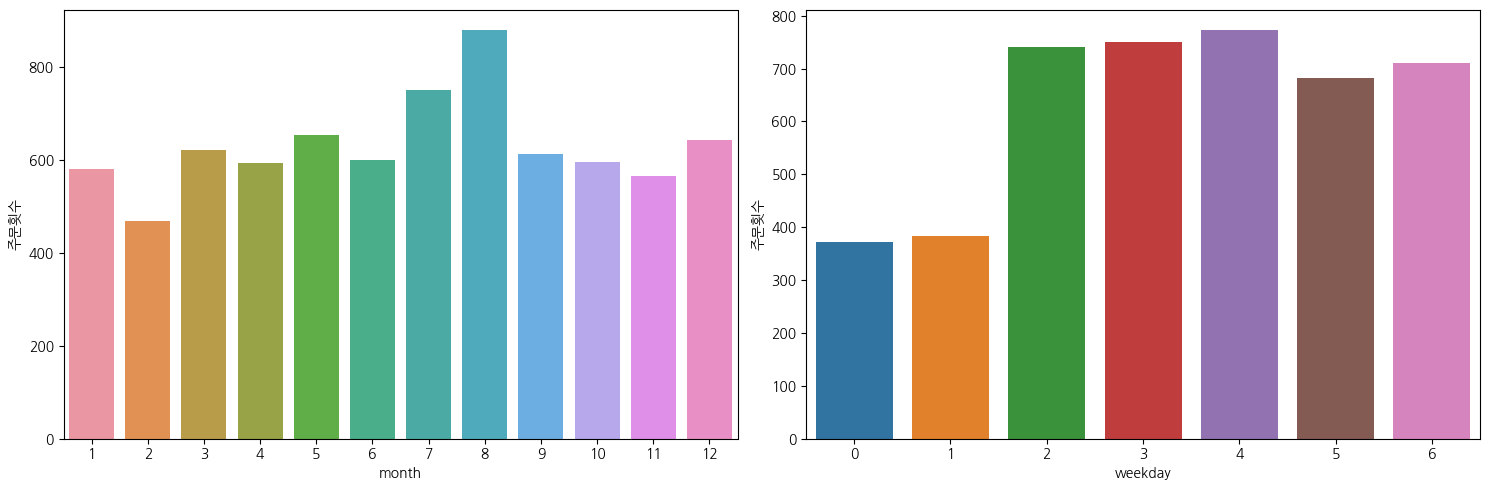

In [42]:
#월별, 요일별 주문횟수 확인(count)
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

sns.barplot(x = 'month', y = '주문횟수', ax = axs[0], data = time_fig, errorbar = None)
sns.barplot(x = 'weekday', y = '주문횟수', ax = axs[1], data = time_fig, errorbar = None)
plt.tight_layout()
plt.show()

- 제품별로도 나눠볼수 있을듯

<Axes: xlabel='고객지역'>

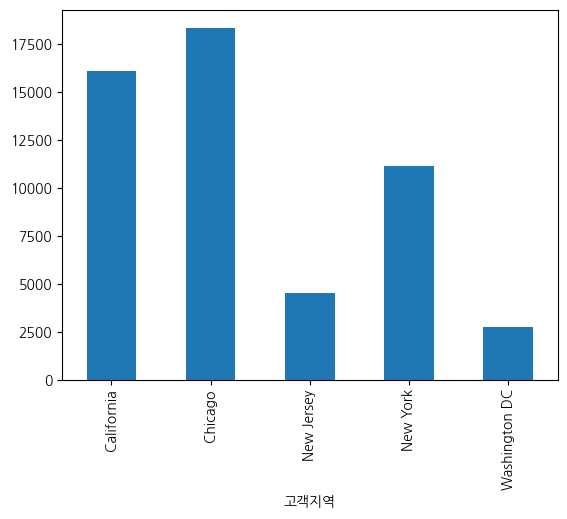

In [43]:
test.groupby('고객지역')['수량'].count().plot.bar()

### 정리

- 5 ~ 20달러 금액이 많음
- 쿠폰은 그냥 클릭만 한 경우가 많음
- 여성 소비자가 남성보다 많음
- 고객지역은 시카고가 제일 많으며 캘리포니아, 뉴욕 순
- 금액이 낮은 구간에 가장 높은 세금 0.18이 발생, 0.1의 경우 비교적 여러 금액대에서 고르게 발생, 금액대가 높아질 수록 낮은 구간의 세금이 발생
- 할인율은 금액대별 고르게 분포
- Nest, Nest-Canada, Nest-USA, Gift Cards, Backpacks 순으로 평균금액이 낮아짐
- apparel, Nest-USA, Office, Drinkware, Lifestyle 순으로 주문수량이 낮아짐
- 2월 주문횟수가 떨어지는 편, 7~8월이 가장 많음
- 월, 화 주문횟수가 떨어지는 편, 나머지 요일은 비등한 편

- 수요가 많으면서(주문수량이 많은 제품), 평균가격이 높은 제품을 파는 방법
- 수요가 많지만, 평균가격이 낮은 제품
- 수요가 적지만, 평균가격이 높은 제품
- 수요가 적고, 평균가격도 낮은 제품

## EDA

In [44]:
!pip show ydata_profiling

Name: ydata-profiling
Version: 4.6.4
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/ydataai/ydata-profiling
Author: YData Labs Inc
Author-email: opensource@ydata.ai
License: MIT
Location: c:\Users\sci\Desktop\rfm_dacon\venv\Lib\site-packages
Requires: dacite, htmlmin, imagehash, jinja2, matplotlib, multimethod, numba, numpy, pandas, phik, pydantic, PyYAML, requests, scipy, seaborn, statsmodels, tqdm, typeguard, visions, wordcloud
Required-by: 


In [45]:
pip install ipywidgets

In [46]:
from ydata_profiling import ProfileReport

# Generate the data profiling report 
report = ProfileReport(test, title='My Data')
report.to_file('my_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\sci\Desktop\rfm_dacon\venv\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning:

There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Chicago'')



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature Engineering

### Recency, Frequency, Monetary

In [47]:
#Recency
last_date = test.groupby('고객ID')['거래날짜'].agg(max).reset_index()
last_date.head()

C:\Users\sci\AppData\Local\Temp\ipykernel_25708\1785687652.py:2: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



고객ID       거래날짜
0  USER_0000 2019-09-15
1  USER_0001 2019-11-02
2  USER_0002 2019-10-19
3  USER_0003 2019-12-14
4  USER_0004 2019-09-15

In [48]:
last_date['recency'] = (last_date['거래날짜'] - last_date['거래날짜'].max()).dt.days

In [49]:
recency = last_date.drop(columns = ['거래날짜'])
recency.head()

고객ID  recency
0  USER_0000     -107
1  USER_0001      -59
2  USER_0002      -73
3  USER_0003      -17
4  USER_0004     -107

In [50]:
#Frequency
frequency = test[['고객ID', '거래ID']].drop_duplicates().groupby('고객ID').count().reset_index()
frequency.rename(columns = {'거래ID': 'frequency'}, inplace = True)
frequency.head()

고객ID  frequency
0  USER_0000          1
1  USER_0001         31
2  USER_0002          8
3  USER_0003         11
4  USER_0004         13

In [51]:
test.head()

고객ID              거래ID       거래날짜          제품ID    제품카테고리  수량    평균금액  \
0  USER_1358  Transaction_0000 2019-01-01  Product_0981  Nest-USA   1  153.71   
1  USER_1358  Transaction_0001 2019-01-01  Product_0981  Nest-USA   1  153.71   
2  USER_1358  Transaction_0002 2019-01-01  Product_0904    Office   1    2.05   
3  USER_1358  Transaction_0003 2019-01-01  Product_0203   Apparel   5   17.53   
4  USER_1358  Transaction_0003 2019-01-01  Product_0848      Bags   1   16.50   

   배송료      쿠폰상태 성별     고객지역  가입기간  오프라인비용   온라인비용   GST    쿠폰코드   할인율  
0  6.5      Used  남  Chicago    12    4500  2424.5  0.10  ELEC10  10.0  
1  6.5      Used  남  Chicago    12    4500  2424.5  0.10  ELEC10  10.0  
2  6.5      Used  남  Chicago    12    4500  2424.5  0.10   OFF10  10.0  
3  6.5  Not Used  남  Chicago    12    4500  2424.5  0.18  SALE10  10.0  
4  6.5      Used  남  Chicago    12    4500  2424.5  0.18   AIO10  10.0

In [52]:
#Monetary
test['price'] = test['수량'] * test['평균금액']
monetary = test.groupby('고객ID')['price'].agg(sum).reset_index()
monetary.rename(columns = {'price': 'monetary'}, inplace = True)
monetary.head()

C:\Users\sci\AppData\Local\Temp\ipykernel_25708\249773973.py:3: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



고객ID  monetary
0  USER_0000     30.99
1  USER_0001  13834.90
2  USER_0002   1442.12
3  USER_0003   1360.07
4  USER_0004   1442.47

In [53]:
#rfm
rfm = recency.merge(frequency, on = '고객ID').merge(monetary, on = '고객ID')
rfm.head()

고객ID  recency  frequency  monetary
0  USER_0000     -107          1     30.99
1  USER_0001      -59         31  13834.90
2  USER_0002      -73          8   1442.12
3  USER_0003      -17         11   1360.07
4  USER_0004     -107         13   1442.47

### RFM Visualization and transform data

In [54]:
import plotly.express as px

fig1 = px.histogram(rfm, x='recency', opacity=0.85, marginal='box')
fig2 = px.histogram(rfm, x='frequency', opacity=0.85, marginal='box')
fig3 = px.histogram(rfm, x=rfm['monetary']/100, opacity=0.85, marginal='box')

fig = make_subplots(rows=6, cols=1)

fig.add_trace(fig1['data'][1], row=1, col=1)
fig.add_trace(fig1['data'][0], row=2, col=1)
fig.add_trace(fig2['data'][1], row=3, col=1)
fig.add_trace(fig2['data'][0], row=4, col=1)
fig.add_trace(fig3['data'][1], row=5, col=1)
fig.add_trace(fig3['data'][0], row=6, col=1)

fig.update_layout(height=1000, width=1000, title_text="RFM Distribution of the Customers")

fig.show()

In [55]:
# 각 변수에 대해 누적 백분율 계산
recency_sorted = rfm['recency'].sort_values()
frequency_sorted = rfm['frequency'].sort_values()
monetary_sorted = rfm['monetary'].sort_values()/100
counts, bin_edges = np.histogram(monetary_sorted, bins=100)

cumulative_counts_recency = np.cumsum(recency_sorted.value_counts().sort_index())
cumulative_counts_frequency = np.cumsum(frequency_sorted.value_counts().sort_index())
cumulative_counts_monetary = np.cumsum(counts)

cumulative_percents_recency = 100 * cumulative_counts_recency / cumulative_counts_recency.max()
cumulative_percents_frequency = 100 * cumulative_counts_frequency / cumulative_counts_frequency.max()
cumulative_percents_monetary = 100 * cumulative_counts_monetary / cumulative_counts_monetary[-1]

# 누적 백분율 히스토그램 그리기

fig = make_subplots(rows=6, cols=1, subplot_titles=('Recency', '', 'Frequency', '', 'Monetary', ''))

fig.add_trace(fig1['data'][1], row=1, col=1)
fig.add_trace(go.Bar(x=cumulative_percents_recency.index, y=cumulative_percents_recency, name='Recency'), row=2, col=1)
fig.add_trace(fig2['data'][1], row=3, col=1)
fig.add_trace(go.Bar(x=cumulative_percents_frequency.index, y=cumulative_percents_frequency, name='Frequency'), row=4, col=1)
fig.add_trace(fig3['data'][1], row=5, col=1)
fig.add_trace(go.Bar(x=bin_edges[1:], y=cumulative_percents_frequency, name='Monetary'), row=6, col=1)

fig.update_layout(height=1200, width=1200, title_text='Box & Cumulative Plots of RFM', title_font=dict(size=24), title_x=0.5)
fig.show()

- plot들을 참고해서 rfm의 score를 부여하는 근거를 다음과 같이 정리할 수 있음
- 1. Recency의 경우, 누적분포가 비교적 완만하므로 분위수로 구간을 나눌 수 있음, 대신 음수이므로 값을 양수로 shift
- 2. Frequency와 Monetary의 경우 바로 분위수로 나누기에는 데이터가 너무 치우쳐진 상태이므로 log scale등으로 변환이 필요

In [56]:
rfm_std = rfm.copy()

rfm_std['recency_shift'] = rfm_std['recency'] + abs(rfm_std['recency'].min()) + 1
rfm_std.drop(columns = ['recency'], inplace=True)
rfm_std['l_frequency'] = np.log(rfm_std['frequency'])
rfm_std['l_monetary'] = np.log(rfm_std['monetary'])
rfm_std.drop(columns=['frequency', 'monetary'], inplace=True)

### Scailing

In [57]:
# pip install scikit-learn

In [58]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_cols = ['recency_shift', 'l_frequency', 'l_monetary']
rfm_std.loc[:, scaler_cols] = scaler.fit_transform(rfm_std[scaler_cols])
rfm_std

C:\Users\sci\AppData\Local\Temp\ipykernel_25708\1280218517.py:6: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.70604396 0.83791209 0.79945055 ... 0.46703297 0.81043956 0.77472527]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



고객ID  recency_shift  l_frequency  l_monetary
0     USER_0000       0.706044     0.000000    0.305550
1     USER_0001       0.837912     0.592781    0.848481
2     USER_0002       0.799451     0.358957    0.647276
3     USER_0003       0.953297     0.413929    0.642063
4     USER_0004       0.706044     0.442766    0.647297
...         ...            ...          ...         ...
1463  USER_1463       0.258242     0.189644    0.560577
1464  USER_1464       0.760989     0.508274    0.691221
1465  USER_1465       0.467033     0.119652    0.411175
1466  USER_1466       0.810440     0.000000    0.506964
1467  USER_1467       0.774725     0.685359    0.779363

[1468 rows x 4 columns]

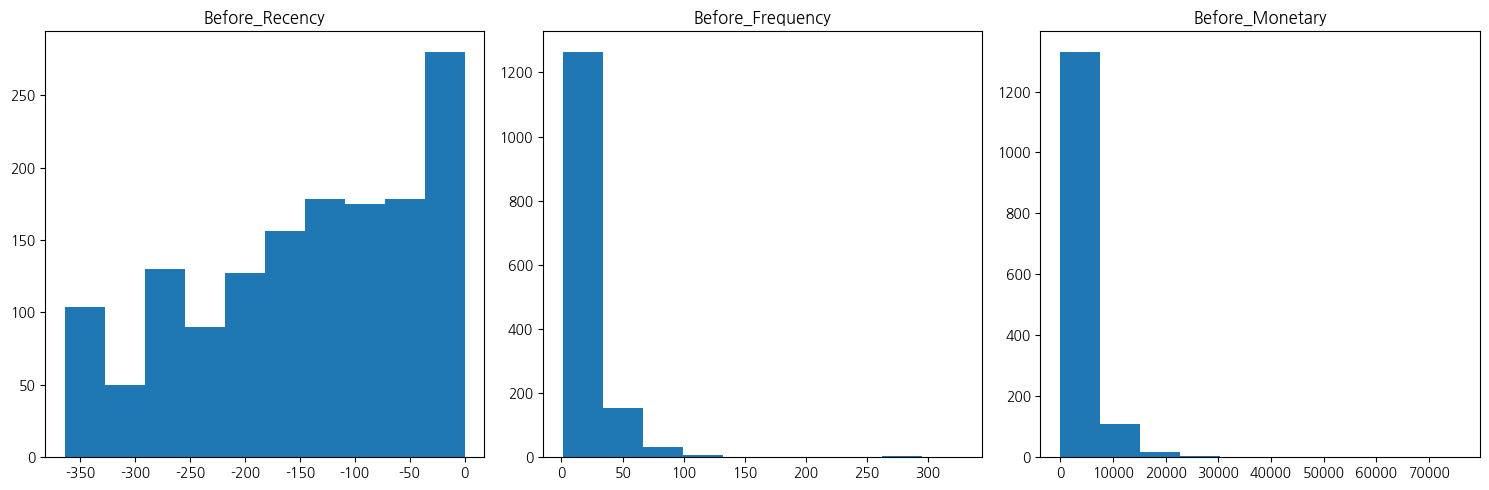

In [59]:
#데이터 변환 및 정규화 전 분포

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist(rfm['recency'])
ax[0].set_title('Before_Recency')

ax[1].hist(rfm['frequency'])
ax[1].set_title('Before_Frequency')

ax[2].hist(rfm['monetary'])
ax[2].set_title('Before_Monetary')

plt.tight_layout()
plt.show()

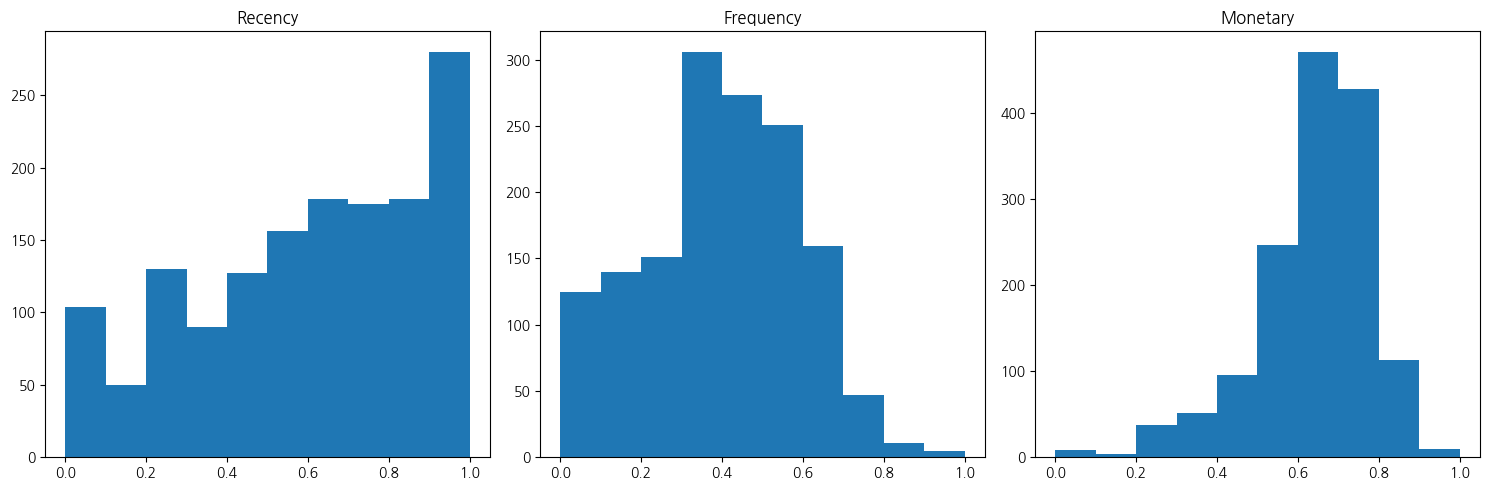

In [60]:
#처리 후
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist(rfm_std['recency_shift'])
ax[0].set_title('Recency')

ax[1].hist(rfm_std['l_frequency'])
ax[1].set_title('Frequency')

ax[2].hist(rfm_std['l_monetary'])
ax[2].set_title('Monetary')

plt.tight_layout()
plt.show()

<Axes: >

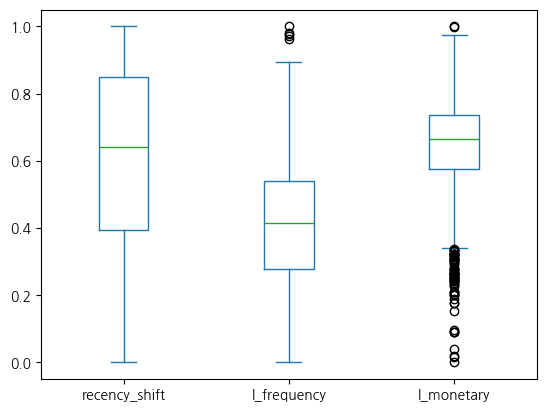

In [61]:
rfm_std.plot.box()

### RFM Scoring

In [62]:
#데이터 특성상 qcut 대신 boxplot의 요소들을 사용해서 분할
#recency
class RFMGrader:
    def __init__(self, df, cols):
        self.df = df
        self.cols = cols
        self.bounds = {}

    def rfm_bounds(self):
        for col in scaler_cols:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_fence = Q1 - 1.5 * IQR
            hiher_fence = Q3 + 1.5 * IQR
            self.bounds[col] = (lower_fence, Q1, Q3, hiher_fence)


    def rfm_grade(self, x, bounds):
        lower_fence, Q1, Q3, higher_fence = bounds
        if x < lower_fence: #하단 이상치 구간
            return 1
        elif x >= lower_fence and x < Q1:
            return 2
        elif x >= Q1 and x <= Q3:
            return 3
        elif x > Q3 and x <= higher_fence:
            return 4
        else:
            return 5
    
    def apply_grades(self):
        self.rfm_bounds()
        for col in self.cols:
            self.df[col + '_grade'] = self.df[col].apply(self.rfm_grade, args=(self.bounds[col],))

In [63]:
grader = RFMGrader(rfm_std, scaler_cols)
grader.apply_grades()

In [64]:
grader_df = grader.df
grader_df

고객ID  recency_shift  l_frequency  l_monetary  recency_shift_grade  \
0     USER_0000       0.706044     0.000000    0.305550                    3   
1     USER_0001       0.837912     0.592781    0.848481                    3   
2     USER_0002       0.799451     0.358957    0.647276                    3   
3     USER_0003       0.953297     0.413929    0.642063                    4   
4     USER_0004       0.706044     0.442766    0.647297                    3   
...         ...            ...          ...         ...                  ...   
1463  USER_1463       0.258242     0.189644    0.560577                    2   
1464  USER_1464       0.760989     0.508274    0.691221                    3   
1465  USER_1465       0.467033     0.119652    0.411175                    3   
1466  USER_1466       0.810440     0.000000    0.506964                    3   
1467  USER_1467       0.774725     0.685359    0.779363                    3   

      l_frequency_grade  l_monetary_grade  
0                     2                 1  
1                     4                 4  
2                     3                 3  
3                     3                 3  
4                     3                 3  
...                 ...               ...  
1463                  2                 2  
1464                  3                 3  
1465                  2                 2  
1466                  2                 2  
1467                  4                 4  

[1468 rows x 7 columns]

### Segmentation

- Champions: 가장 최근에 가장 자주 구매하고 지출이 많은 최고의 고객. 브랜드를 홍보하는 데 도움이 되는 고객.

- Loyal Customer: 챔피온 다음으로 가는 충성 고객.

- Potential Loyalists: 평균 빈도를 보이고 상당한 금액을 지출한 최근 고객. 멤버십 또는 로열티 프로그램을 제공하거나 관련 제품을 추천하여 상향 판매 필요. 로얄 또는 챔피언이 될수있도록 장려.

- Promising: 최근 방문하였으나, 지출이 낮은 고객.

- New Customers: 전체 RFM 점수가 높지만 자주 예매를 하지 않는 고객. 온보딩 지원과 방문을 늘리기 위한 특별 제안 제공 필요.

- About To Sleep: 방문 및 예매 횟수가 평균 미만인 고객.

- Need attention: 방문 및 예매 횟수가 평균 이상인 고객. 하지만 최근에 구매하지 않았을 수도 있음.

- At Risk Customers: 자주 구매하고 많은 금액을 지출했지만 최근에는 예매한 적이 없는 고객. 캠페인 및 유용한 제품을 제공하여 다음 예매를 장려.

- Can’t Lose Them: 예전에는 자주 방문하였으나 최근에는 방문이 뜸한 고객. 관련 프로모션을 통해 고객을 다시 데려오고 설문조사를 실시하여 무엇이 잘못되었는지 알아내고 피드백이 필요.

- Hibernating: 휴면 고객

In [65]:
test_seg = grader_df.copy()

In [66]:
test_seg['RF_score'] = test_seg['recency_shift_grade'].astype(str) + test_seg['l_frequency_grade'].astype(str)
test_seg['Total_score'] = test_seg['recency_shift_grade'].astype(int) + test_seg['l_frequency_grade'].astype(int) + test_seg['l_monetary_grade'].astype(int)
test_seg.head()

고객ID  recency_shift  l_frequency  l_monetary  recency_shift_grade  \
0  USER_0000       0.706044     0.000000    0.305550                    3   
1  USER_0001       0.837912     0.592781    0.848481                    3   
2  USER_0002       0.799451     0.358957    0.647276                    3   
3  USER_0003       0.953297     0.413929    0.642063                    4   
4  USER_0004       0.706044     0.442766    0.647297                    3   

   l_frequency_grade  l_monetary_grade RF_score  Total_score  
0                  2                 1       32            6  
1                  4                 4       34           11  
2                  3                 3       33            9  
3                  3                 3       43           10  
4                  3                 3       33            9

In [67]:
segment = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At-Risk',
    r'[1-2]5': "Can't Loose",
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

test_seg['segment'] = test_seg['RF_score'].replace(segment, regex = True)
test_seg.head()

고객ID  recency_shift  l_frequency  l_monetary  recency_shift_grade  \
0  USER_0000       0.706044     0.000000    0.305550                    3   
1  USER_0001       0.837912     0.592781    0.848481                    3   
2  USER_0002       0.799451     0.358957    0.647276                    3   
3  USER_0003       0.953297     0.413929    0.642063                    4   
4  USER_0004       0.706044     0.442766    0.647297                    3   

   l_frequency_grade  l_monetary_grade RF_score  Total_score  \
0                  2                 1       32            6   
1                  4                 4       34           11   
2                  3                 3       33            9   
3                  3                 3       43           10   
4                  3                 3       33            9   

               segment  
0       About To Sleep  
1      Loyal Customers  
2       Need Attention  
3  Potential Loyalists  
4       Need Attention

In [68]:
pip install squarify

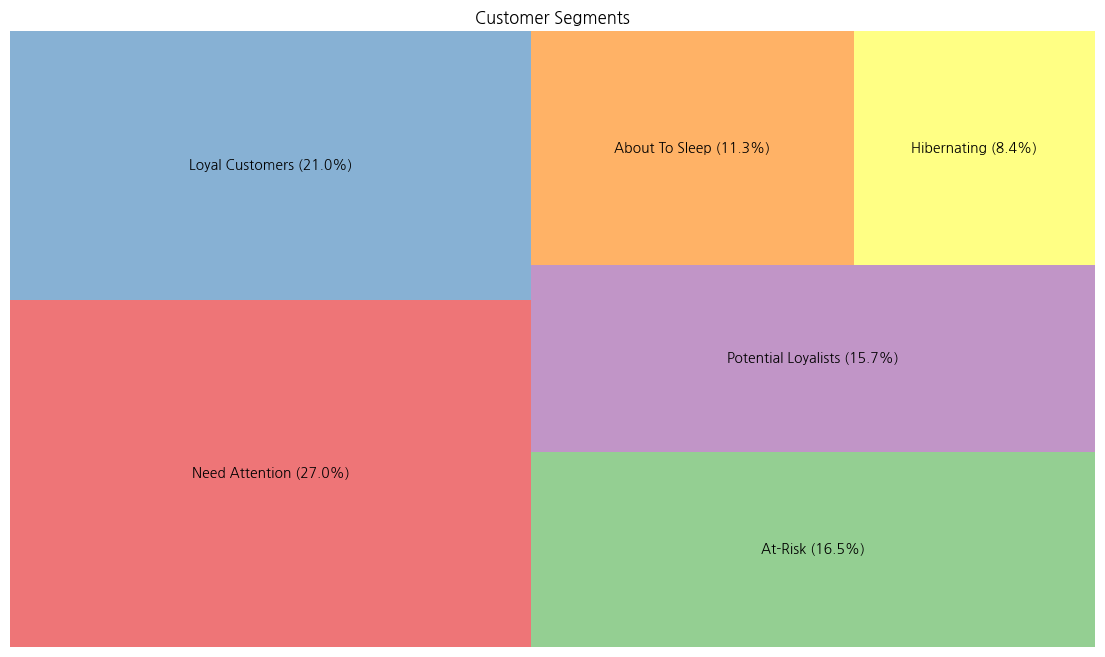

In [69]:
import squarify
import matplotlib.pyplot as plt

# 세그먼트별 고객 수 계산
sizes = test_seg['segment'].value_counts()

# 세그먼트별 비중 계산
percentages = sizes / sizes.sum() * 100

# 세그먼트별 라벨 생성
labels = [f'{segment} ({percentage:.1f}%)' for segment, percentage in zip(sizes.index, percentages)]

# 트리맵 그리기
plt.figure(figsize=(14, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.6, color=sns.color_palette('Set1', len(sizes)))
plt.title('Customer Segments')
plt.axis('off')
plt.show()

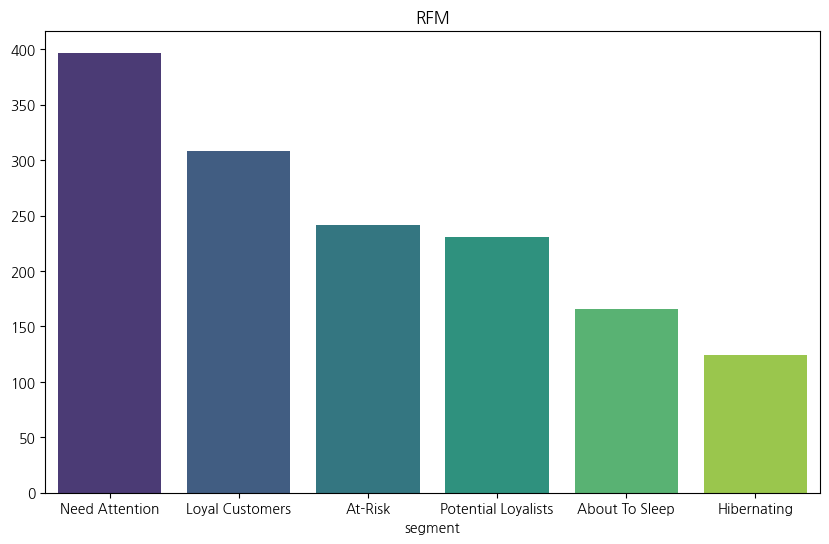

In [70]:
top10 = test_seg['segment'].value_counts()[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=top10.index, y=top10.values, palette='viridis')
plt.title('RFM')
plt.show()

In [84]:
top10

segment
Need Attention         397
Loyal Customers        308
At-Risk                242
Potential Loyalists    231
About To Sleep         166
Hibernating            124
Name: count, dtype: int64

- Need Attention 그룹과, At Risk 그룹을 개선하는게 우선과제

In [71]:
df = test.merge(test_seg, on = '고객ID')
df.head()

고객ID              거래ID       거래날짜          제품ID    제품카테고리  수량    평균금액  \
0  USER_1358  Transaction_0000 2019-01-01  Product_0981  Nest-USA   1  153.71   
1  USER_1358  Transaction_0001 2019-01-01  Product_0981  Nest-USA   1  153.71   
2  USER_1358  Transaction_0002 2019-01-01  Product_0904    Office   1    2.05   
3  USER_1358  Transaction_0003 2019-01-01  Product_0203   Apparel   5   17.53   
4  USER_1358  Transaction_0003 2019-01-01  Product_0848      Bags   1   16.50   

   배송료      쿠폰상태 성별     고객지역  가입기간  오프라인비용   온라인비용   GST    쿠폰코드   할인율  \
0  6.5      Used  남  Chicago    12    4500  2424.5  0.10  ELEC10  10.0   
1  6.5      Used  남  Chicago    12    4500  2424.5  0.10  ELEC10  10.0   
2  6.5      Used  남  Chicago    12    4500  2424.5  0.10   OFF10  10.0   
3  6.5  Not Used  남  Chicago    12    4500  2424.5  0.18  SALE10  10.0   
4  6.5      Used  남  Chicago    12    4500  2424.5  0.18   AIO10  10.0   

    price  recency_shift  l_frequency  l_monetary  recency_shift_grade  \
0  153.71       0.068681     0.893516    0.929926                    2   
1  153.71       0.068681     0.893516    0.929926                    2   
2    2.05       0.068681     0.893516    0.929926                    2   
3   87.65       0.068681     0.893516    0.929926                    2   
4   16.50       0.068681     0.893516    0.929926                    2   

   l_frequency_grade  l_monetary_grade RF_score  Total_score  segment  
0                  4                 4       24           10  At-Risk  
1                  4                 4       24           10  At-Risk  
2                  4                 4       24           10  At-Risk  
3                  4                 4       24           10  At-Risk  
4                  4                 4       24           10  At-Risk

## Customer Characteristics

In [72]:
df.shape

(52924, 27)

In [73]:
df['segment'].unique()

array(['At-Risk', 'Loyal Customers', 'Need Attention', 'Hibernating',
       'About To Sleep', 'Potential Loyalists'], dtype=object)

In [74]:
df.groupby('segment')[['평균금액', '수량', '할인율', '가입기간']].agg({
    '평균금액': 'mean',
    '수량': 'sum',
    '할인율': 'mean',
    '가입기간': 'mean'
})

평균금액      수량        할인율       가입기간
segment                                                     
About To Sleep       29.979186    4100  18.990228  23.804560
At-Risk              50.719821   41448  17.329170  26.432770
Hibernating          35.428362    3277  14.913386  27.004724
Loyal Customers      54.023614  131000  19.915975  26.074500
Need Attention       44.241600   40381  20.274047  26.638540
Potential Loyalists  66.423850   17827  23.377787  25.243332

- 평균 할인율이 높은데, 평균 금액이 높은 것은 단가가 높은 아이템을 구매하는 경향이 있을 수도 있음(potential loyalists를 개선하려면 여기에 속한 고객들의 경향 파악 필요해보임)
- 사실 Potential Loyal쪽이 평균 금액은 높은데, 수량 차이로 인해서 결국 At-Risk와 Need Attention쪽 그룹을 해결하는게 우선순위일 가능성이 있음.고객 및 segment별 지역 분포를 확인해봐야 함.
- Need Attention을 보면 할인율이 높다고 해서 모든 문제가 해결되는 것은 아님(무엇인가 다른 요소가 영향을 미치고 있는 것 같음)

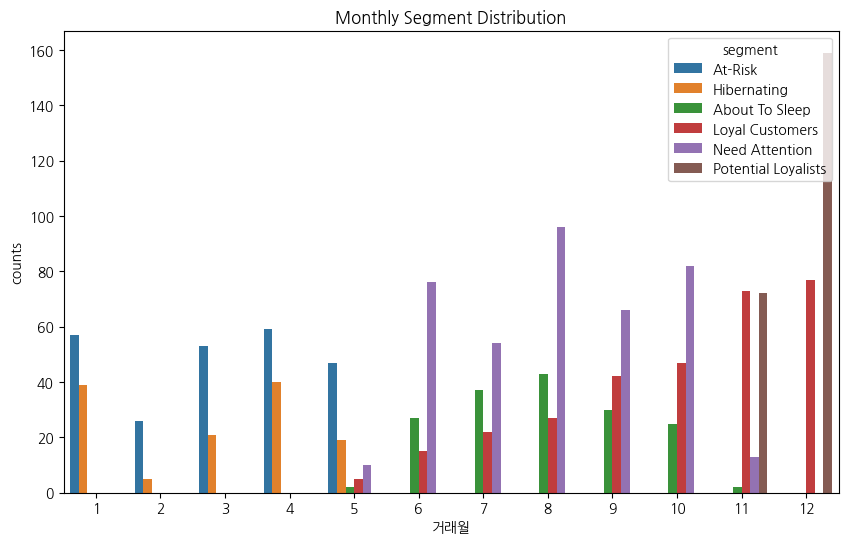

In [75]:
#거래월별 고객분포
df_recent = df.groupby(['고객ID', 'segment'])['거래날짜'].max().reset_index()
df_recent['거래월'] = df_recent['거래날짜'].dt.month
df_month = df_recent.groupby(['거래월', 'segment']).size().reset_index(name = 'counts')
plt.figure(figsize=(10,6))
sns.barplot(x='거래월', y='counts', hue='segment', data=df_month)
plt.title('Monthly Segment Distribution')
plt.show()

- recency를 분할한 근거는 box plot에 있음
- Loyal customer 고객들은 5월부터 꾸준히 증가
- Potential한 고객들은 비교적 최근인 11월부터 증가(거래빈도가 상대적으로 낮은 이유, 그리고 이들이 구매하는 아이템이 시즌용인지 파악이 필요)
- At Risk 고객들은 1~5월에 많았음
- Need Attention 고객들은 5~11월 사이이지만 5월, 11월은 낮은 편이었고 12월부터 사라짐

In [76]:
#segment 및 거래월별 거래량이 많았던 top3
df['거래월'] = df['거래날짜'].dt.month
category_counts = df.sort_values('수량', ascending=False).groupby(['segment', '거래월']).head(3)

In [77]:
category_counts.head(3)

고객ID               거래ID       거래날짜          제품ID  제품카테고리   수량  \
42456  USER_0546  Transaction_19068 2019-10-16  Product_0914  Office  900   
21364  USER_1361  Transaction_10049 2019-06-08  Product_0914  Office  825   
20992  USER_1081   Transaction_9871 2019-06-05  Product_0914  Office  825   

       평균금액    배송료  쿠폰상태 성별        고객지역  가입기간  오프라인비용    온라인비용  GST   쿠폰코드  \
42456  0.99  12.99  Used  여  California    24    2500  1218.60  0.1  OFF10   
21364  0.79  85.33  Used  남     Chicago    34    3500  1598.46  0.1  OFF30   
20992  0.79  85.33  Used  여    New York    45    3500  3202.10  0.1  OFF30   

        할인율   price  recency_shift  l_frequency  l_monetary  \
42456  10.0  891.00       0.870879     0.645203    0.840584   
21364  30.0  651.75       0.774725     0.575211    0.749345   
20992  30.0  651.75       0.848901     0.709626    0.818912   

       recency_shift_grade  l_frequency_grade  l_monetary_grade RF_score  \
42456                    4                  4                 4       44   
21364                    3                  4                 4       34   
20992                    3                  4                 4       34   

       Total_score          segment  거래월  
42456           12  Loyal Customers   10  
21364           11  Loyal Customers    6  
20992           11  Loyal Customers    6

C:\Users\sci\AppData\Local\Temp\ipykernel_25708\814864792.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\sci\AppData\Local\Temp\ipykernel_25708\814864792.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\sci\AppData\Local\Temp\ipykernel_25708\814864792.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future ver

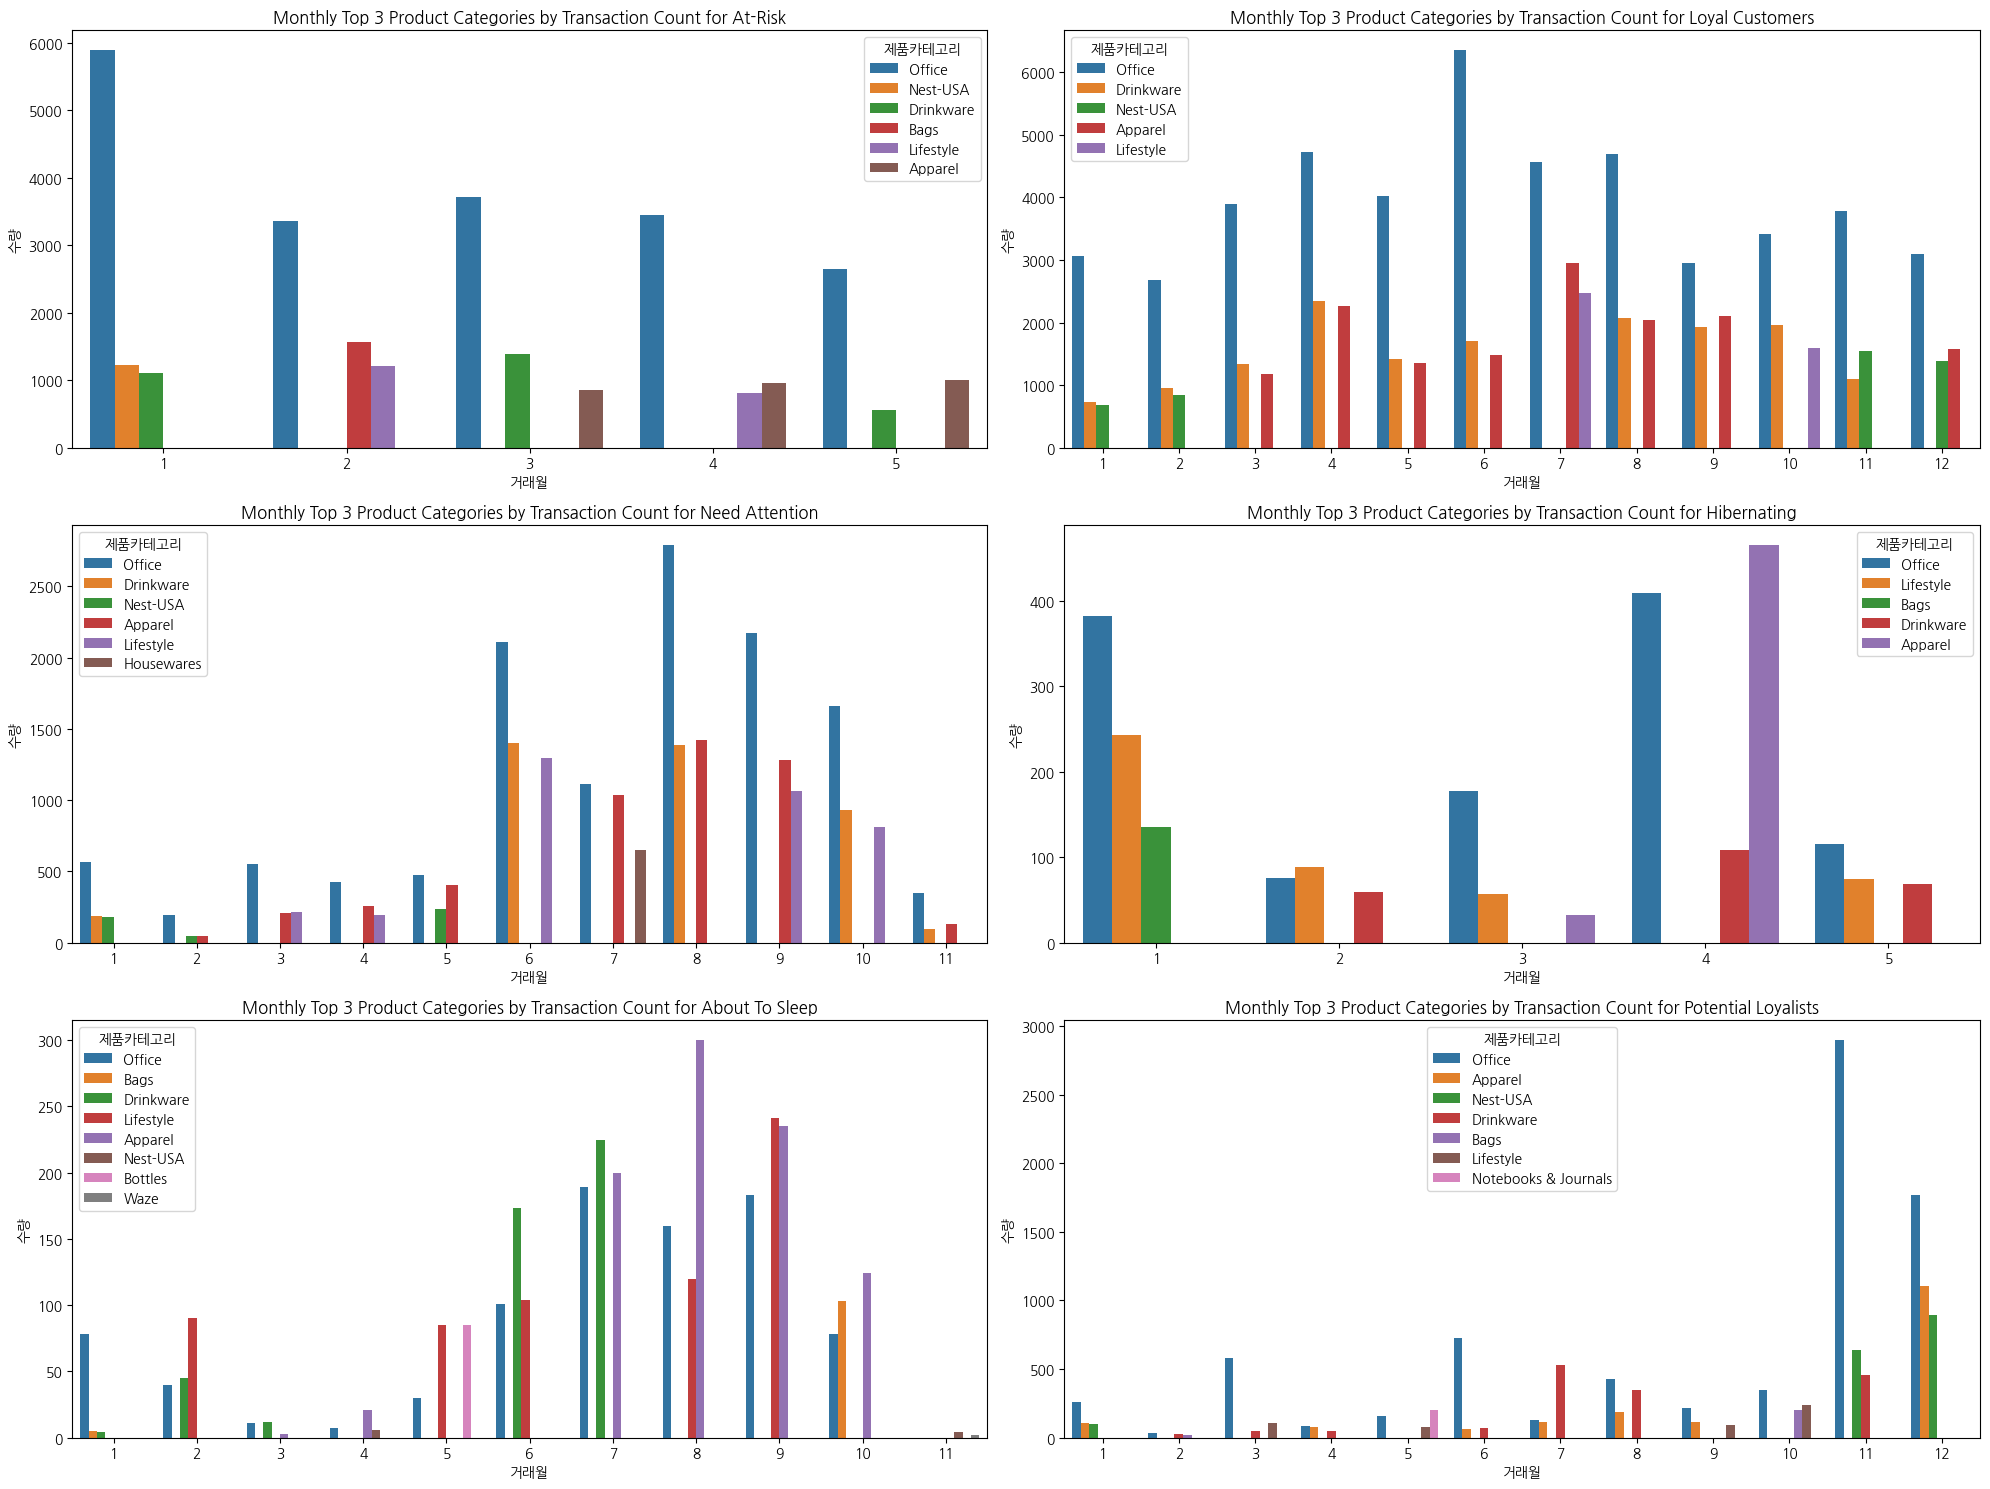

In [78]:
#plotting을 위해 segment별로 데이터 분할
segments = df['segment'].unique()
segment_dfs = {segment: df[df['segment'] == segment] for segment in segments}

top3_categories_by_segment = {}
for segment, segment_df in segment_dfs.items():
    category_counts = segment_df.groupby(['거래월', '제품카테고리'])['수량'].sum().reset_index()
    top3_categories_by_segment[segment] = category_counts.groupby('거래월').apply(lambda x: x.nlargest(3, '수량')).reset_index(drop=True)

fig, axes = plt.subplots(3, 2, figsize=(20, 15))

for i, (segment, top3_categories) in enumerate(top3_categories_by_segment.items()):
    row = i // 2
    col = i % 2
    sns.barplot(data=top3_categories, x='거래월', y='수량', hue='제품카테고리', ax=axes[row, col], errorbar=None)
    axes[row, col].set_title(f'Monthly Top 3 Product Categories by Transaction Count for {segment}')

plt.tight_layout()
plt.show()

- 월별 분포에서는 Potential Loyalists나 다른 그룹들의 거래횟수가 일부 없는 것처럼 보였으나, 거래 수량이 존재함
- 이는 일부 소수 인원이 대량 구매하는 것을 알 수 있음

C:\Users\sci\AppData\Local\Temp\ipykernel_25708\793792908.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\sci\AppData\Local\Temp\ipykernel_25708\793792908.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\sci\AppData\Local\Temp\ipykernel_25708\793792908.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future ver

<function matplotlib.pyplot.show(close=None, block=None)>

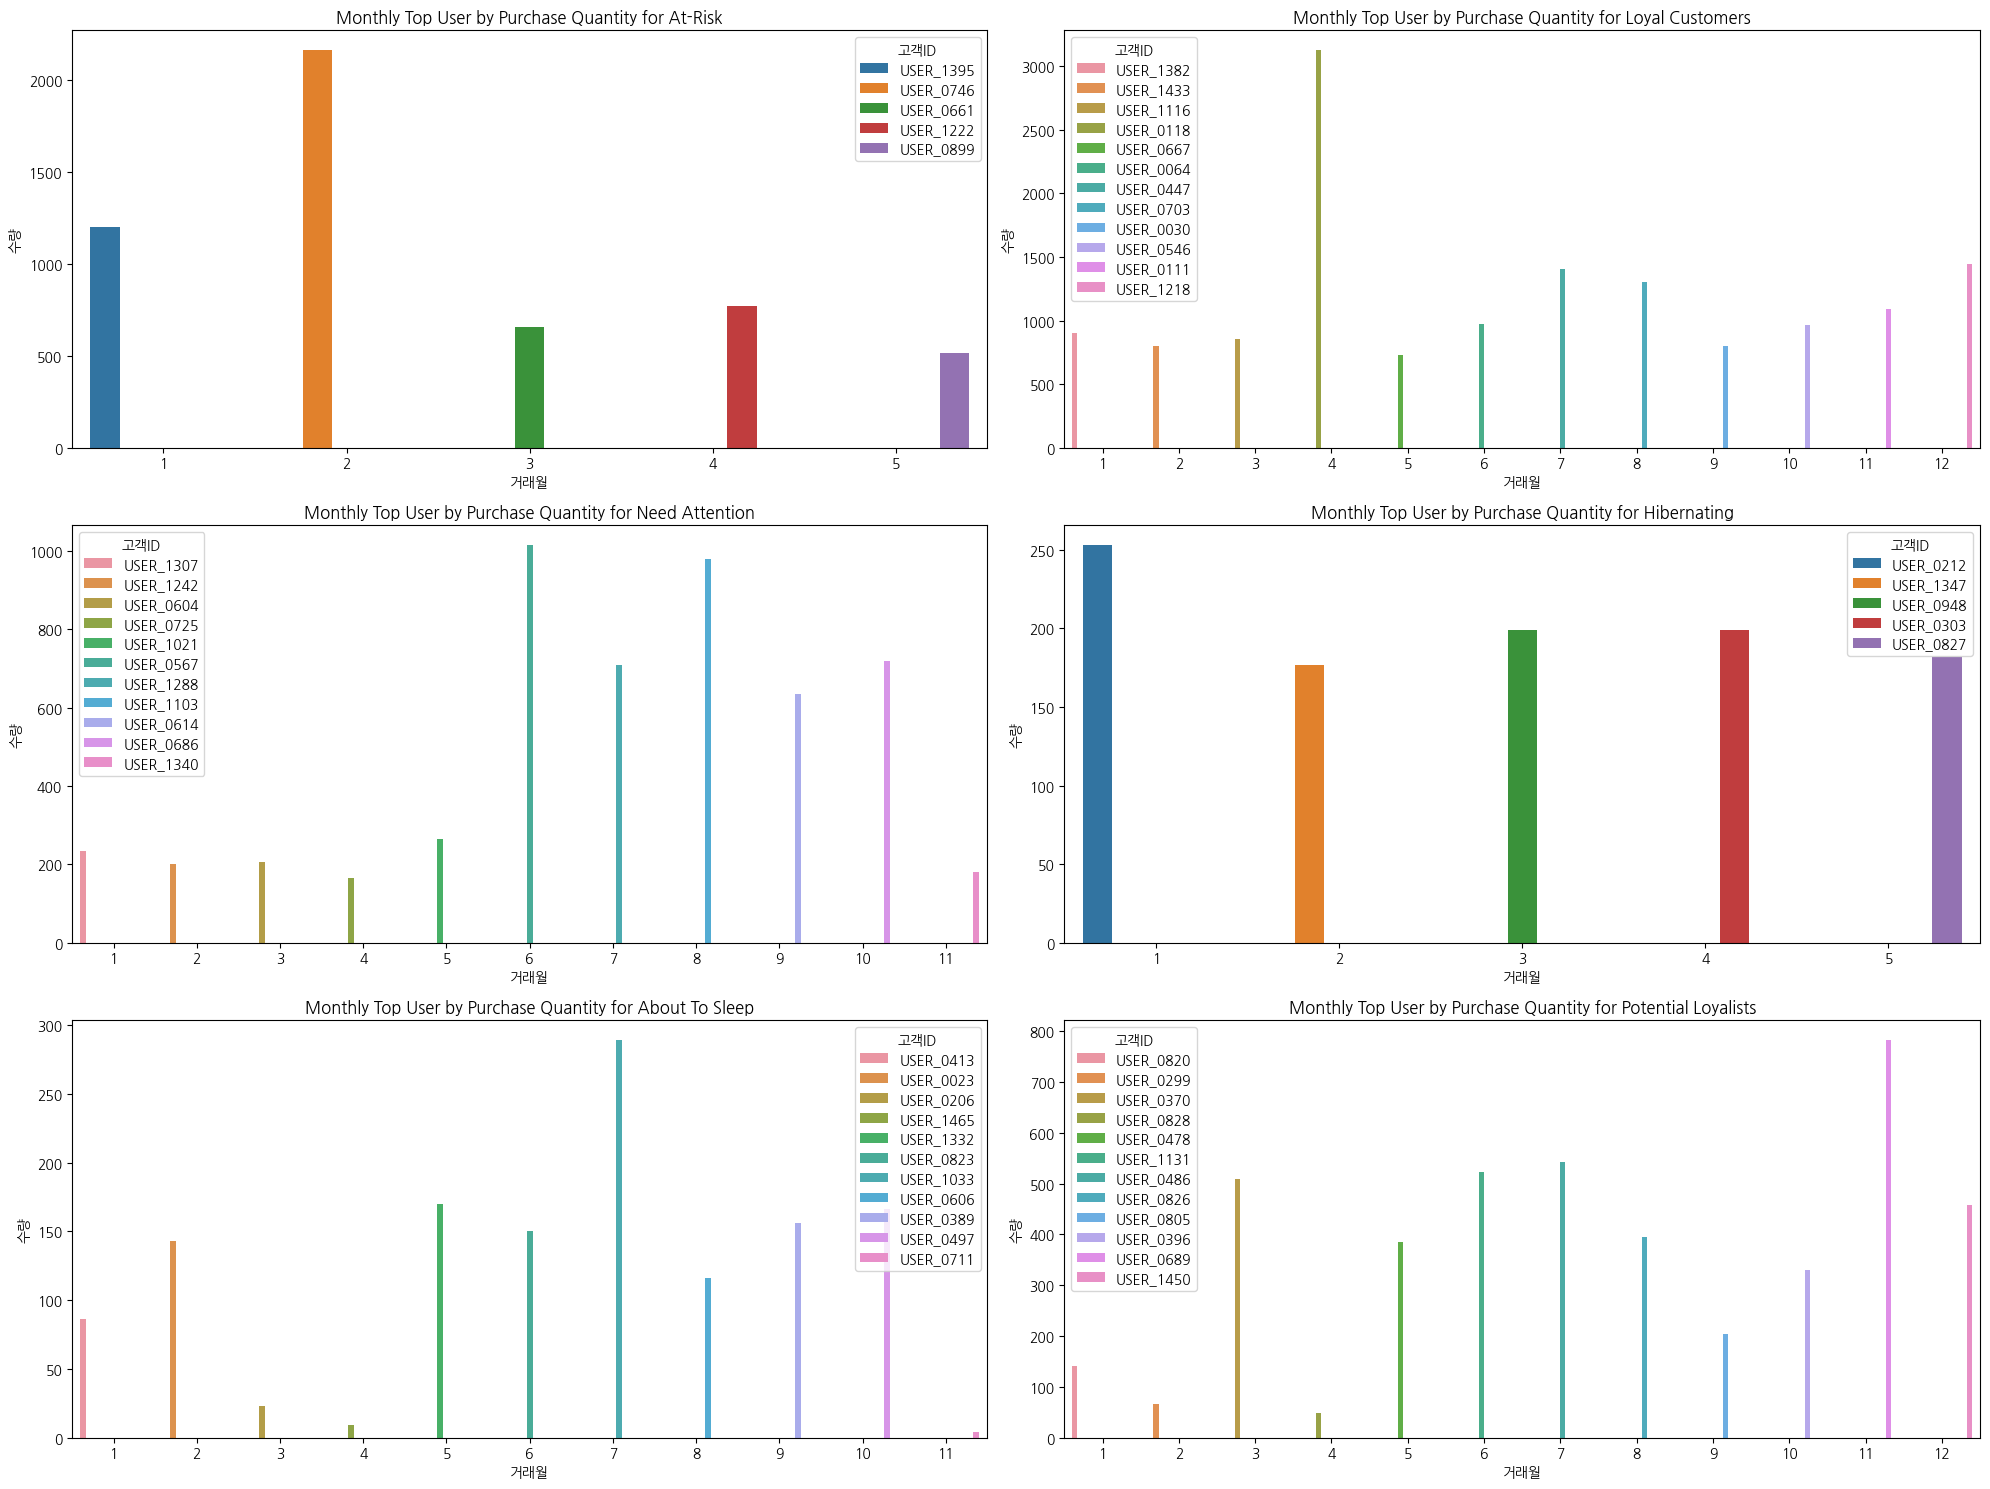

In [81]:
top_user_by_segment = {}
for segment, segment_df in segment_dfs.items():
    segment_df.loc[:, '거래날짜'] = pd.to_datetime(segment_df['거래날짜'])
    segment_df.loc[:, '거래월'] = segment_df['거래날짜'].dt.month
    user_counts = segment_df.groupby(['거래월', '고객ID'])['수량'].sum().reset_index()
    top_user_by_segment[segment] = user_counts.groupby('거래월').apply(lambda x: x.nlargest(1, '수량')).reset_index(drop=True)

fig, axes = plt.subplots(3, 2, figsize=(20, 15))

for i, (segment, top_users) in enumerate(top_user_by_segment.items()):
    row = i // 2
    col = i % 2
    sns.barplot(data=top_users, x='거래월', y='수량', hue='고객ID', ax=axes[row, col], errorbar=None)
    axes[row, col].set_title(f'Monthly Top User by Purchase Quantity for {segment}')

plt.tight_layout()
plt.show

In [74]:
df_unique = df.drop_duplicates(subset=['고객ID', '고객지역'])
df_reg = df_unique['segment'].groupby(df_unique['고객지역']).value_counts().reset_index(name='count')

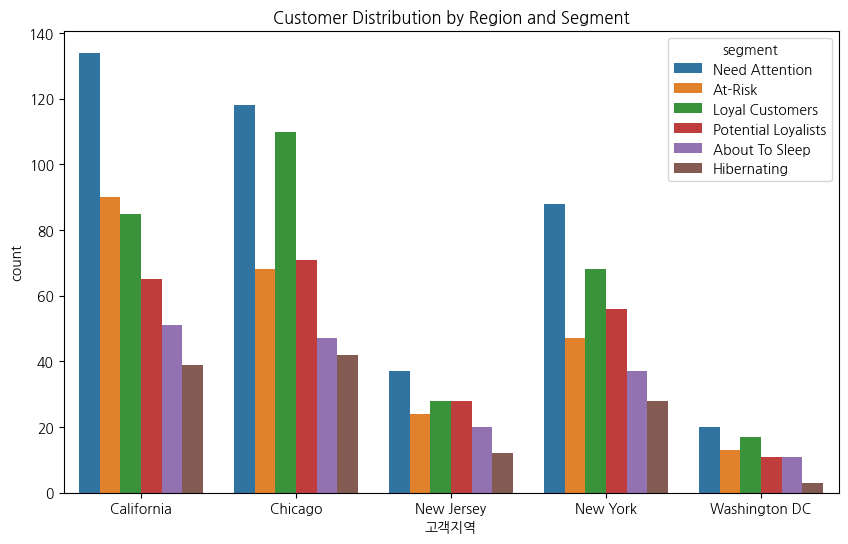

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(x='고객지역', y='count', hue='segment', data=df_reg)
plt.title('Customer Distribution by Region and Segment')
plt.show()

1) 캘리포니아
 - N.A
 - A.R
 - Loyal


2) 시카고
 - N.A
 - Loyal
 - A.R

3) 뉴욕
 - N.A
 - Loyal
 - A.R

4) 뉴저지
 - N.A
 - Loyal
 - A.R

5) 워싱턴
 - N.A
 - L.C
 - A.R
 - P.L


 ----------------------------------------------------------------
 - 모든 도시가 N.A층이 가장 많음.
 - A.R와 Loyal층이 차순
 - N.A층을 공략하는 것이 우선순위, 차순위는 A.R

In [76]:
df_cp = df.groupby('segment')['쿠폰상태'].value_counts().reset_index()
df_cp

segment      쿠폰상태  count
0        About To Sleep   Clicked    445
1        About To Sleep      Used    327
2        About To Sleep  Not Used    149
3               At-Risk   Clicked   4175
4               At-Risk      Used   2722
5               At-Risk  Not Used   1269
6           Hibernating   Clicked    323
7           Hibernating      Used    218
8           Hibernating  Not Used     94
9       Loyal Customers   Clicked  14931
10      Loyal Customers      Used   9918
11      Loyal Customers  Not Used   4547
12       Need Attention   Clicked   4740
13       Need Attention      Used   3150
14       Need Attention  Not Used   1342
15  Potential Loyalists   Clicked   2312
16  Potential Loyalists      Used   1569
17  Potential Loyalists  Not Used    693

- 한 고객이 같은 날에 여러개의 물건을 구매하는 경우(count)일지라도, 어떤 물품에는 쿠폰을 안쓰는 경우도 있었음.
- 고객층별 쿠폰 사용 비율을 비교해볼 필요가 있음

In [85]:
not_used = df_cp[df_cp['쿠폰상태'].isin(['Clicked', 'Not Used'])].groupby('segment')['count'].sum()
used = df_cp[df_cp['쿠폰상태'] == 'Used'].groupby('segment')['count'].sum()
segment_used_rate  = used / (not_used + used)
df_cp['used_rate'] = df_cp['segment'].map(segment_used_rate)
df_cp

segment      쿠폰상태  count  used_rate
0        About To Sleep   Clicked    445   0.355049
1        About To Sleep      Used    327   0.355049
2        About To Sleep  Not Used    149   0.355049
3               At-Risk   Clicked   4175   0.333333
4               At-Risk      Used   2722   0.333333
5               At-Risk  Not Used   1269   0.333333
6           Hibernating   Clicked    323   0.343307
7           Hibernating      Used    218   0.343307
8           Hibernating  Not Used     94   0.343307
9       Loyal Customers   Clicked  14931   0.337393
10      Loyal Customers      Used   9918   0.337393
11      Loyal Customers  Not Used   4547   0.337393
12       Need Attention   Clicked   4740   0.341205
13       Need Attention      Used   3150   0.341205
14       Need Attention  Not Used   1342   0.341205
15  Potential Loyalists   Clicked   2312   0.343026
16  Potential Loyalists      Used   1569   0.343026
17  Potential Loyalists  Not Used    693   0.343026

<Axes: xlabel='segment'>

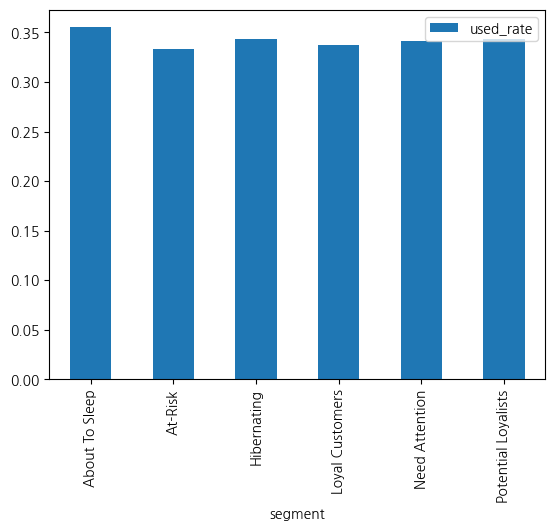

In [91]:
cp_rate = df_cp.drop_duplicates(subset=['segment', 'used_rate']).drop(columns = ['쿠폰상태', 'count'])
cp_rate.set_index('segment').plot.bar()

- 할인율이 높더라도 loyal층이 아니라는 것은 위에서 먼저 확인한 사실
- 쿠폰 사용률 또한 유의미한 차이를 확인하기 어려움

In [228]:
# pip install yellowbrick

In [221]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

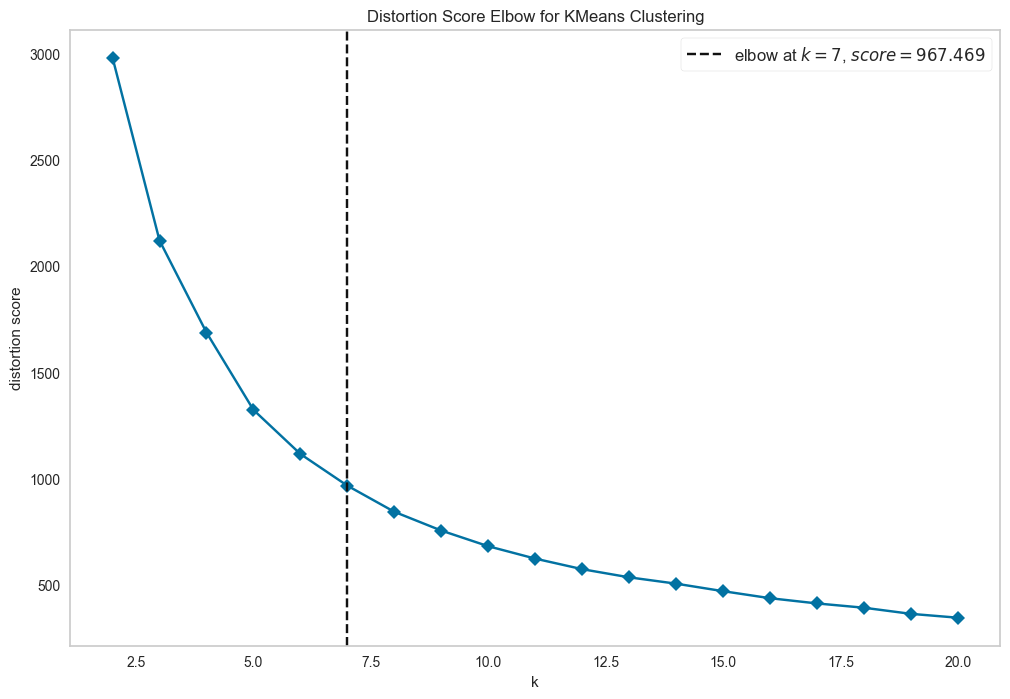

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [222]:
features = ['recency_shift', 'l_frequency',	'l_monetary']

kmeans_ = KMeans(random_state = 101, init='k-means++', n_init = 10)

fig, ax = plt.subplots(figsize = (12, 8))
ax.grid(False)

visualizer = KElbowVisualizer(kmeans_, k = (2, 21), timings = False)

visualizer.fit(df[features])
visualizer.show()

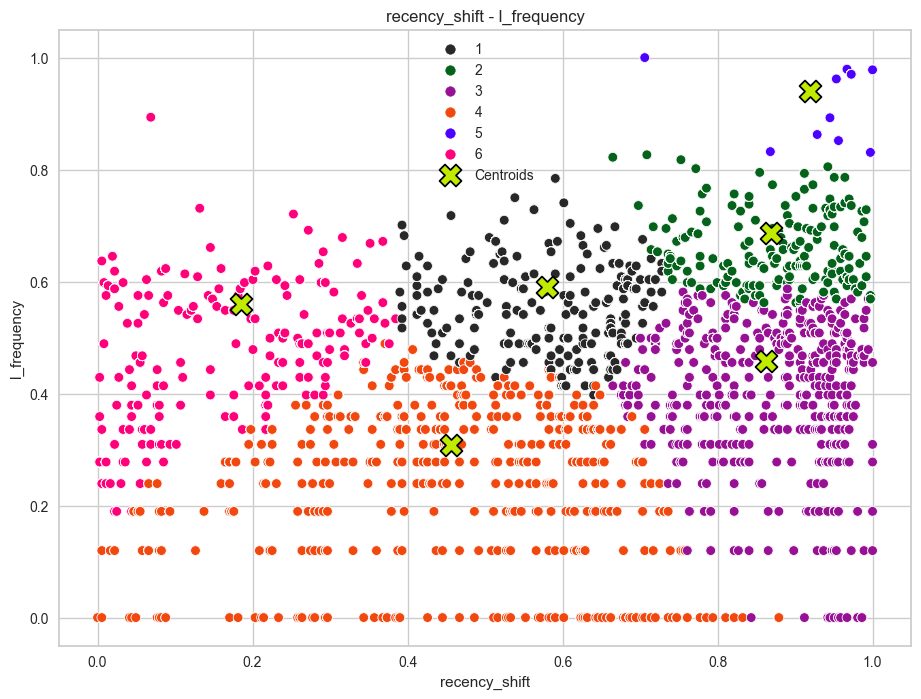

In [226]:
from itertools import combinations

kmeans = KMeans(n_clusters = 6, random_state = 101, init='k-means++', n_init = 10) 
kmeans.fit(df[features])
cluster = (kmeans.labels_)+1

fig= plt.subplots(figsize = (11, 8))

for i, feature in list(enumerate(combinations(["recency_shift", "l_frequency"], 2))):
    # 2개의 요소를 포함하는 모든 조합(combinations) 생성(ex: ('R', 'M'), ('M', 'R')). 순서가 달라도 같은 조합으로 간주. -> enumerate로 인덱스와 함께 열거

    sns.scatterplot(x = df[feature[0]], y = df[feature[1]], hue = cluster, 
                    palette = palette[: len(set(cluster))], ).set_title(feature[0] + " - " + feature[1])

    sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1],
                    s = 250, color = '#C0EB00', label = 'Centroids', marker = "X", edgecolor = "black")

plt.show()

In [227]:
df['cluster'] = cluster
df.head()

고객ID              거래ID       거래날짜          제품ID    제품카테고리  수량    평균금액  \
0  USER_1358  Transaction_0000 2019-01-01  Product_0981  Nest-USA   1  153.71   
1  USER_1358  Transaction_0001 2019-01-01  Product_0981  Nest-USA   1  153.71   
2  USER_1358  Transaction_0002 2019-01-01  Product_0904    Office   1    2.05   
3  USER_1358  Transaction_0003 2019-01-01  Product_0203   Apparel   5   17.53   
4  USER_1358  Transaction_0003 2019-01-01  Product_0848      Bags   1   16.50   

   배송료      쿠폰상태 성별     고객지역  가입기간  오프라인비용   온라인비용   GST    쿠폰코드   할인율  \
0  6.5      Used  남  Chicago    12    4500  2424.5  0.10  ELEC10  10.0   
1  6.5      Used  남  Chicago    12    4500  2424.5  0.10  ELEC10  10.0   
2  6.5      Used  남  Chicago    12    4500  2424.5  0.10   OFF10  10.0   
3  6.5  Not Used  남  Chicago    12    4500  2424.5  0.18  SALE10  10.0   
4  6.5      Used  남  Chicago    12    4500  2424.5  0.18   AIO10  10.0   

    price  recency_shift  l_frequency  l_monetary  recency_shift_grade  \
0  153.71       0.068681     0.893516    0.929926                    2   
1  153.71       0.068681     0.893516    0.929926                    2   
2    2.05       0.068681     0.893516    0.929926                    2   
3   87.65       0.068681     0.893516    0.929926                    2   
4   16.50       0.068681     0.893516    0.929926                    2   

   l_frequency_grade  l_monetary_grade RF_score  Total_score  segment  cluster  
0                  4                 4       24           10  At-Risk        6  
1                  4                 4       24           10  At-Risk        6  
2                  4                 4       24           10  At-Risk        6  
3                  4                 4       24           10  At-Risk        6  
4                  4                 4       24           10  At-Risk        6

In [230]:
df.groupby('segment')['cluster'].value_counts().reset_index()

segment  cluster  count
0        About To Sleep        4    802
1        About To Sleep        3    119
2               At-Risk        6   6795
3               At-Risk        4   1080
4               At-Risk        1    291
5           Hibernating        4    570
6           Hibernating        6     65
7       Loyal Customers        2  15816
8       Loyal Customers        1   7518
9       Loyal Customers        5   4345
10      Loyal Customers        3   1717
11       Need Attention        1   3356
12       Need Attention        3   3183
13       Need Attention        4   2693
14  Potential Loyalists        3   4571
15  Potential Loyalists        4      3

In [ ]:
#클러스터별로 어떤 고객들의 지출이 많았는지
#